<a href="https://colab.research.google.com/github/Praz98/HomeLLC/blob/main/EDA_HomeLLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import matplotlib.pyplot as plt
import warnings

In [3]:
tdf = pd.read_csv("/content/drive/MyDrive/cleaned data/merged_data.csv")
df = tdf.copy()


In [4]:
df.head(4)

DATE  avg_expenditure_55_64  avg_expenditure_35_44  \
0  2000-01                39517.0                45296.0   
1  2000-02                39694.0                45443.0   
2  2000-03                39871.0                45590.0   
3  2000-04                40048.0                45737.0   

   avg_expenditure_45_54       CPI  avg_expenditure_25_34  \
0                46308.0  0.297089                38987.0   
1                46456.0  0.592417                39029.0   
2                46604.0  0.824499                39071.0   
3                46752.0  0.058411                39113.0   

   employees_construction    HCAI_PP  houses-for-sale-to-sold        GDP  ...  \
0                  6752.0  17.087188                      4.3  10002.179  ...   
1                  6730.0  16.927188                      4.3  10084.029  ...   
2                  6811.0  16.767188                      4.3  10165.879  ...   
3                  6794.0  16.593754                      4.4  10247.720  ...   

   house_units_completed_cum  industrial_production_cement_rate  \
0                     1574.0                                NaN   
1                     3251.0                                NaN   
2                     4955.0                                NaN   
3                     6565.0                                NaN   

   pvt_owned_house_under_const_rate  PERMIT_rate  job_gains_private_rate  \
0                               NaN          NaN                     NaN   
1                               NaN          NaN                     NaN   
2                               NaN          NaN                     NaN   
3                               NaN          NaN                     NaN   

   house_units_completed_rate  PERMIT_TREND  job_gains_private_trend  \
0                         NaN          DOWN                     DOWN   
1                         NaN          DOWN                     DOWN   
2                         NaN          DOWN                     DOWN   
3                         NaN          DOWN                     DOWN   

   pvt_owned_house_under_const_trend  house_units_completed_trend  
0                               DOWN                         DOWN  
1                               DOWN                         DOWN  
2                               DOWN                         DOWN  
3                               DOWN                         DOWN  

[4 rows x 109 columns]

In [5]:
df.corr()

<ipython-input-5-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


avg_expenditure_55_64  \
avg_expenditure_55_64                           1.000000   
avg_expenditure_35_44                           0.987202   
avg_expenditure_45_54                           0.989412   
CPI                                            -0.082708   
avg_expenditure_25_34                           0.986894   
...                                                  ...   
industrial_production_cement_rate              -0.603638   
pvt_owned_house_under_const_rate               -0.589721   
PERMIT_rate                                    -0.597751   
job_gains_private_rate                         -0.586784   
house_units_completed_rate                     -0.597320   

                                   avg_expenditure_35_44  \
avg_expenditure_55_64                           0.987202   
avg_expenditure_35_44                           1.000000   
avg_expenditure_45_54                           0.991164   
CPI                                            -0.083899   
avg_expenditure_25_34                           0.992994   
...                                                  ...   
industrial_production_cement_rate              -0.566101   
pvt_owned_house_under_const_rate               -0.549065   
PERMIT_rate                                    -0.558361   
job_gains_private_rate                         -0.551490   
house_units_completed_rate                     -0.557825   

                                   avg_expenditure_45_54       CPI  \
avg_expenditure_55_64                           0.989412 -0.082708   
avg_expenditure_35_44                           0.991164 -0.083899   
avg_expenditure_45_54                           1.000000 -0.089670   
CPI                                            -0.089670  1.000000   
avg_expenditure_25_34                           0.988177 -0.077098   
...                                                  ...       ...   
industrial_production_cement_rate              -0.572146  0.081088   
pvt_owned_house_under_const_rate               -0.557231  0.082851   
PERMIT_rate                                    -0.564029  0.081703   
job_gains_private_rate                         -0.555936  0.078936   
house_units_completed_rate                     -0.565373  0.084076   

                                   avg_expenditure_25_34  \
avg_expenditure_55_64                           0.986894   
avg_expenditure_35_44                           0.992994   
avg_expenditure_45_54                           0.988177   
CPI                                            -0.077098   
avg_expenditure_25_34                           1.000000   
...                                                  ...   
industrial_production_cement_rate              -0.596125   
pvt_owned_house_under_const_rate               -0.580886   
PERMIT_rate                                    -0.589209   
job_gains_private_rate                         -0.579261   
house_units_completed_rate                     -0.588472   

                                   employees_construction   HCAI_PP  \
avg_expenditure_55_64                            0.153639 -0.754194   
avg_expenditure_35_44                            0.220868 -0.711928   
avg_expenditure_45_54                            0.159603 -0.755387   
CPI                                              0.070729  0.115615   
avg_expenditure_25_34                            0.166170 -0.725057   
...                                                   ...       ...   
industrial_production_cement_rate                0.132252  0.506492   
pvt_owned_house_under_const_rate                 0.167707  0.520242   
PERMIT_rate                                      0.152599  0.526296   
job_gains_private_rate                           0.096679  0.466546   
house_units_completed_rate                       0.156873  0.523100   

                                   houses-for-sale-to-sold       GDP  \
avg_expenditure_55_64                             0.137266  0.984731   
avg_expenditure_35_44             

In [6]:
demo = df.copy()
demo = demo[["population","avg_expenditure_25_34","avg_expenditure_35_44","avg_expenditure_55_64","avg_expenditure_45_54","target"]]
demo

population  avg_expenditure_25_34  avg_expenditure_35_44  \
0     281304.00                38987.0                45296.0   
1     281536.67                39029.0                45443.0   
2     281769.34                39071.0                45590.0   
3     282002.00                39113.0                45737.0   
4     282257.67                39155.0                45884.0   
..          ...                    ...                    ...   
247   331929.67                61820.0                77865.0   
248   331987.34                62342.0                78328.0   
249   332045.00                62864.0                78791.0   
250   332026.33                63386.0                79254.0   
251   332007.66                63908.0                79717.0   

     avg_expenditure_55_64  avg_expenditure_45_54   target  
0                  39517.0                46308.0  100.551  
1                  39694.0                46456.0  101.339  
2                  39871.0                46604.0  102.126  
3                  40048.0                46752.0  102.922  
4                  40225.0                46900.0  103.677  
..                     ...                    ...      ...  
247                68686.0                80831.0  222.484  
248                69157.0                81586.0  225.937  
249                69628.0                82341.0  229.888  
250                70099.0                83096.0  233.253  
251                70570.0                83851.0  236.433  

[252 rows x 6 columns]

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(demo, *['population'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(demo, *['avg_expenditure_25_34'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(demo, *['avg_expenditure_35_44'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(demo, *['avg_expenditure_55_64'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(demo, *['population'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(demo, *['avg_expenditure_25_34'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(demo, *['avg_expenditure_35_44'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(demo, *['avg_expenditure_55_64'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(demo, *[[['population', 'avg_expenditure_25_34'], ['avg_expenditure_25_34', 'avg_expenditure_35_44'], ['avg_expenditure_35_44', 'avg_expenditure_55_64'], ['avg_expenditure_55_64', 'avg_expenditure_45_54']]], **{})
chart

Text(0.5, 1.0, 'target')

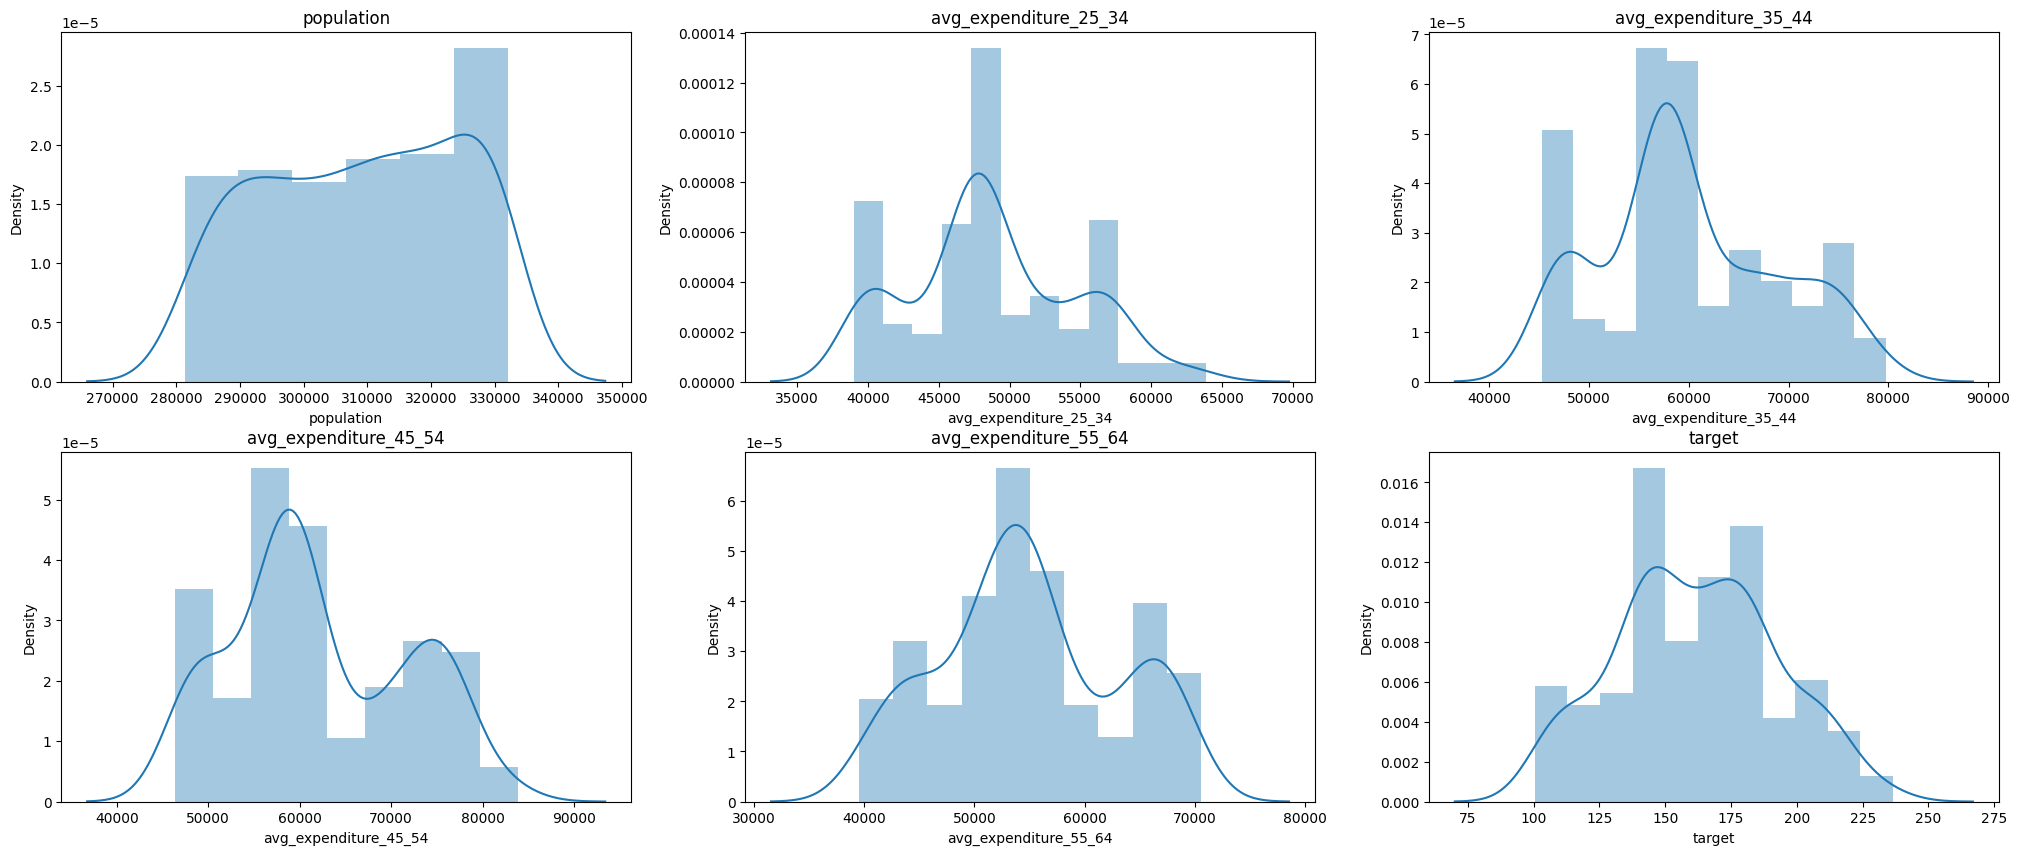

In [7]:
# Suppress the warning
warnings.filterwarnings("ignore", category=UserWarning)

# Distribution plots
figure, axis = plt.subplots(2, 3, figsize=(25,10))

sns.distplot(demo['population'], ax=axis[0, 0])
axis[0, 0].set_title("population")

sns.distplot(demo['avg_expenditure_25_34'], ax=axis[0, 1])
axis[0, 1].set_title("avg_expenditure_25_34")

sns.distplot(demo['avg_expenditure_35_44'], ax=axis[0, 2])
axis[0, 2].set_title("avg_expenditure_35_44")



sns.distplot(demo['avg_expenditure_45_54'], ax=axis[1, 0])
axis[1, 0].set_title("avg_expenditure_45_54")

sns.distplot(demo['avg_expenditure_55_64'], ax=axis[1, 1])
axis[1, 1].set_title("avg_expenditure_55_64")

sns.distplot(demo['target'], ax=axis[1, 2])
axis[1, 2].set_title("target")

Text(0.5, 1.0, 'target')

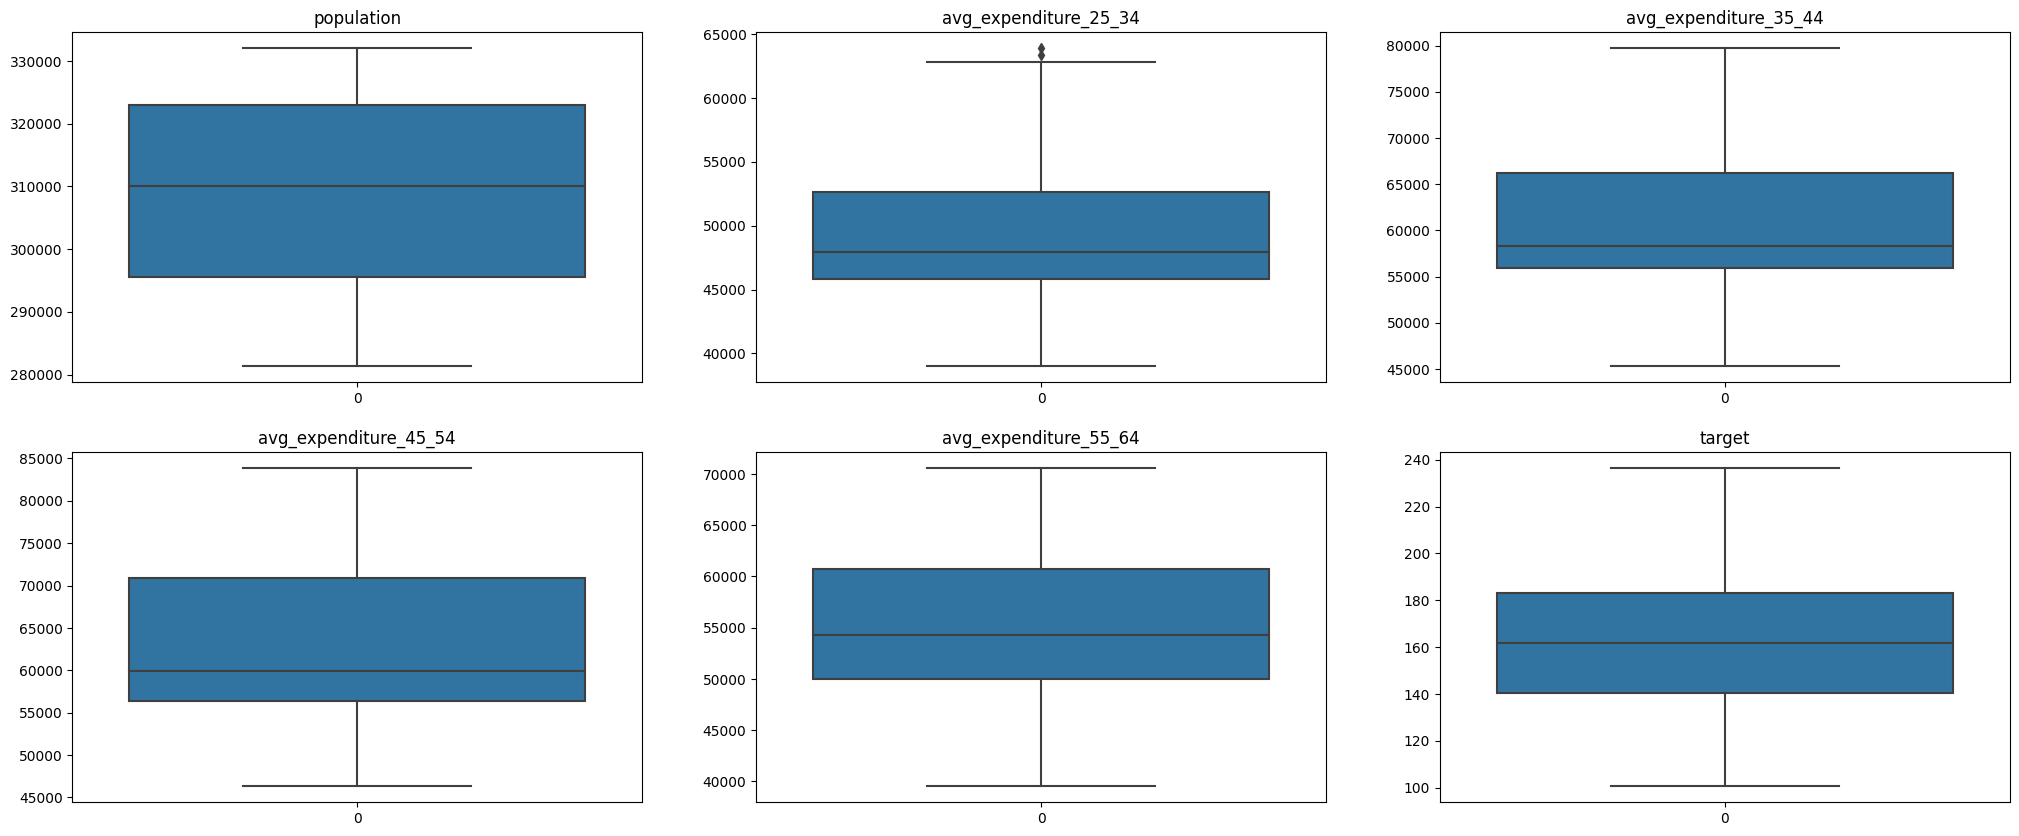

In [8]:
figure, axis = plt.subplots(2, 3, figsize=(25,10))

sns.boxplot(demo['population'], ax=axis[0, 0])
axis[0, 0].set_title("population")

sns.boxplot(demo['avg_expenditure_25_34'], ax=axis[0, 1])
axis[0, 1].set_title("avg_expenditure_25_34")

sns.boxplot(demo['avg_expenditure_35_44'], ax=axis[0, 2])
axis[0, 2].set_title("avg_expenditure_35_44")



sns.boxplot(demo['avg_expenditure_45_54'], ax=axis[1, 0])
axis[1, 0].set_title("avg_expenditure_45_54")

sns.boxplot(demo['avg_expenditure_55_64'], ax=axis[1, 1])
axis[1, 1].set_title("avg_expenditure_55_64")

sns.boxplot(demo['target'], ax=axis[1, 2])
axis[1, 2].set_title("target")

In [9]:
# Double y axis plot
def plot_line(df,col1,col2,lag1 = 0,lag2= 0):

    col1_val = df[col1].shift(lag1)
    col2_val = df[col2].shift(lag2)

    fig,ax = plt.subplots()

    ax.plot(df.index, col1_val, color="blue", marker=".")

    ax.set_xlabel("DATE",fontsize=10)

    ax.set_ylabel(col1,color="blue",fontsize=10)

    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(df.index, col2_val,color="red",marker=".")
    ax2.set_ylabel(col2,color="red",fontsize=10)
    plt.show()

    print(np.corrcoef(col1_val.dropna(),col2_val.dropna()))

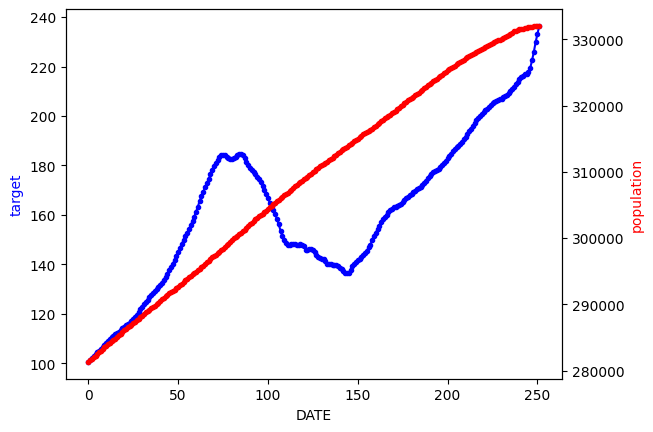

[[1.         0.77564025]
 [0.77564025 1.        ]]


In [10]:
plot_line(demo,"target","population")

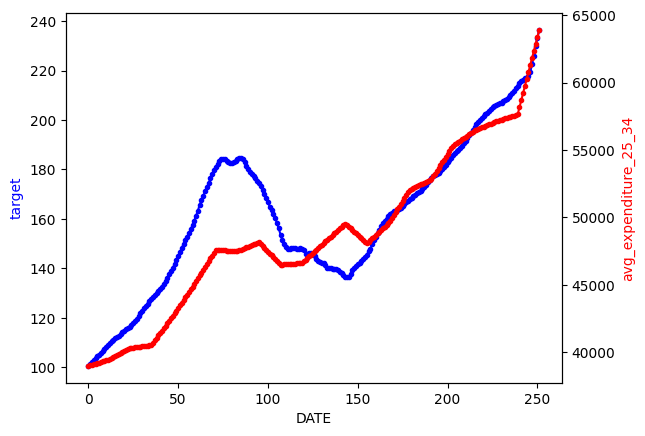

[[1.         0.90279284]
 [0.90279284 1.        ]]


In [11]:
plot_line(demo,"target","avg_expenditure_25_34")

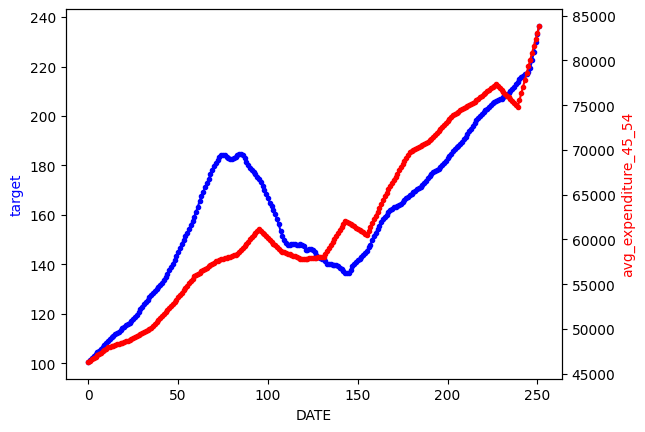

[[1.         0.87843856]
 [0.87843856 1.        ]]


In [12]:
plot_line(demo,"target","avg_expenditure_45_54")

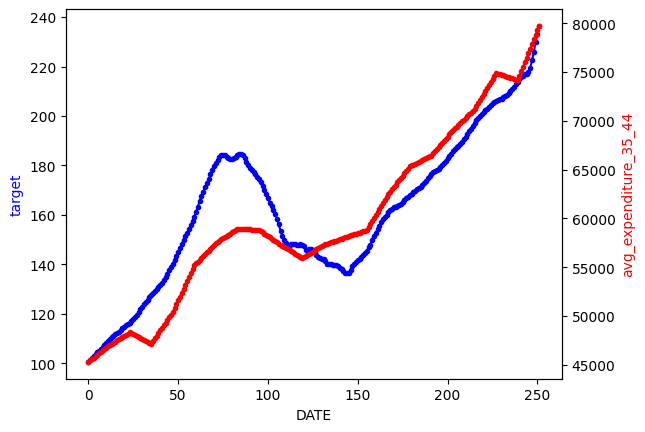

[[1.         0.91615853]
 [0.91615853 1.        ]]


In [13]:
plot_line(demo,"target","avg_expenditure_35_44")

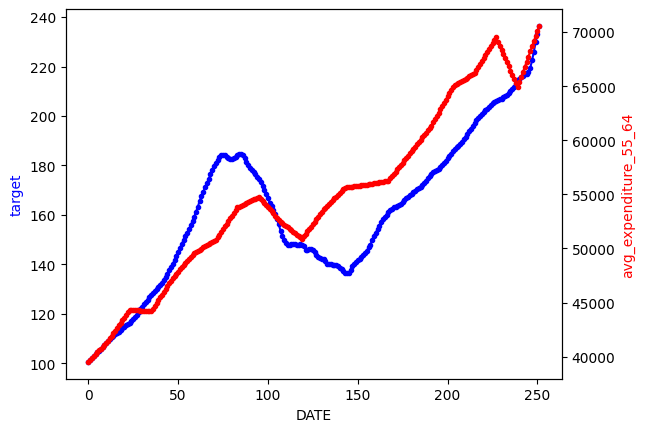

[[1.        0.8846261]
 [0.8846261 1.       ]]


In [14]:
plot_line(demo,"target","avg_expenditure_55_64")

<Axes: >

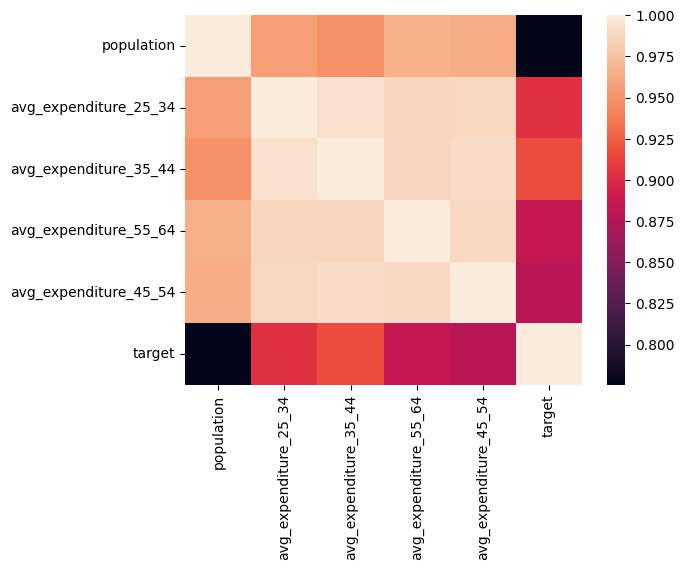

In [15]:
sns.heatmap(demo.corr())

In [16]:
demo["avg_expenditure_55_64_lag12"] = demo.avg_expenditure_55_64.shift(12).dropna()
demo["avg_expenditure_35_44_lag12"] = demo.avg_expenditure_35_44.shift(12).dropna()
demo["avg_expenditure_25_34_lag12"] = demo.avg_expenditure_25_34.shift(12).dropna()
demo["avg_expenditure_45_54_lag12"] = demo.avg_expenditure_45_54.shift(12).dropna()
demo["population_lag"] = demo.population.shift(12).dropna()

<Axes: >

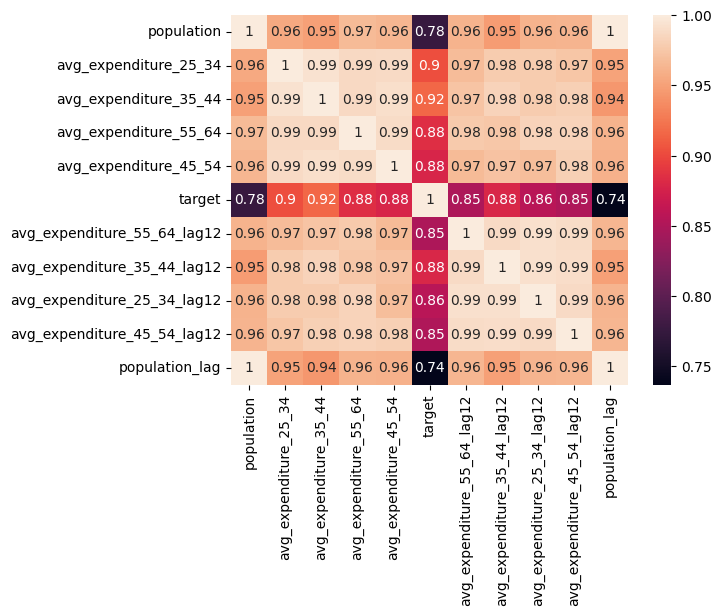

In [17]:
sns.heatmap(demo.corr(),annot=True)

In [18]:
demo["avg_expenditure_55_64_rate"] = np.log(demo.avg_expenditure_55_64/demo.avg_expenditure_55_64.shift(12))
demo["avg_expenditure_35_44_rate"] = np.log(demo.avg_expenditure_35_44/demo.avg_expenditure_35_44.shift(12))
demo["avg_expenditure_25_34_rate"] = np.log(demo.avg_expenditure_25_34/demo.avg_expenditure_25_34.shift(12))
demo["avg_expenditure_45_54_rate"] = np.log(demo.avg_expenditure_45_54/demo.avg_expenditure_45_54.shift(12))

In [19]:
(demo.corr())

population  avg_expenditure_25_34  \
population                     1.000000               0.955682   
avg_expenditure_25_34          0.955682               1.000000   
avg_expenditure_35_44          0.948984               0.992994   
avg_expenditure_55_64          0.966230               0.986894   
avg_expenditure_45_54          0.963762               0.988177   
target                         0.775640               0.902793   
avg_expenditure_55_64_lag12    0.961970               0.967423   
avg_expenditure_35_44_lag12    0.946963               0.978222   
avg_expenditure_25_34_lag12    0.961640               0.977656   
avg_expenditure_45_54_lag12    0.962891               0.973313   
population_lag                 0.999823               0.951697   
avg_expenditure_55_64_rate    -0.221532              -0.126102   
avg_expenditure_35_44_rate     0.024843               0.130108   
avg_expenditure_25_34_rate     0.060163               0.224611   
avg_expenditure_45_54_rate    -0.023366               0.064275   

                             avg_expenditure_35_44  avg_expenditure_55_64  \
population                                0.948984               0.966230   
avg_expenditure_25_34                     0.992994               0.986894   
avg_expenditure_35_44                     1.000000               0.987202   
avg_expenditure_55_64                     0.987202               1.000000   
avg_expenditure_45_54                     0.991164               0.989412   
target                                    0.916159               0.884626   
avg_expenditure_55_64_lag12               0.972666               0.976582   
avg_expenditure_35_44_lag12               0.982944               0.975013   
avg_expenditure_25_34_lag12               0.977784               0.983286   
avg_expenditure_45_54_lag12               0.981344               0.983473   
population_lag                            0.944382               0.961749   
avg_expenditure_55_64_rate               -0.140555              -0.108575   
avg_expenditure_35_44_rate                0.150137               0.117670   
avg_expenditure_25_34_rate                0.190936               0.137756   
avg_expenditure_45_54_rate                0.045371               0.032457   

                             avg_expenditure_45_54    target  \
population                                0.963762  0.775640   
avg_expenditure_25_34                     0.988177  0.902793   
avg_expenditure_35_44                     0.991164  0.916159   
avg_expenditure_55_64                     0.989412  0.884626   
avg_expenditure_45_54                     1.000000  0.878439   
target                                    0.878439  1.000000   
avg_expenditure_55_64_lag12               0.966176  0.849333   
avg_expenditure_35_44_lag12               0.971745  0.878808   
avg_expenditure_25_34_lag12               0.968664  0.856915   
avg_expenditure_45_54_lag12               0.980725  0.850637   
population_lag                            0.960758  0.736993   
avg_expenditure_55_64_rate               -0.106673 -0.119905   
avg_expenditure_35_44_rate                0.150049  0.197979   
avg_expenditure_25_34_rate                0.205436  0.257139   
avg_expenditure_45_54_rate                0.098165  0.057814   

                             avg_expenditure_55_64_lag12  \
population                                      0.961970   
avg_expenditure_25_34                           0.967423   
avg_expenditure_35_44                           0.972666   
avg_expenditure_55_64                           0.976582   
avg_expenditure_45_54                           0.966176   
target                                          0.849333   
avg_expenditure_55_64_lag12                     1.000000   
avg_expenditure_35_44_lag12                     0.988674   
avg_expenditure_25_34_lag12                     0.992426   
avg_expenditure_45_54_lag12                     0.989125   
population_lag                                  0.9632

Since median age of homebuyers(all) is 47 years in USA, we'll combine average expenditure 35-44 age group with average expenditure 45-54 age group
Source [https://www.financialsamurai.com/the-median-homebuyer-age-is-now-so-old/]

In [20]:
# df["avg_expenditure_35_54"] = df["avg_expenditure_35_44"] +df["avg_expenditure_45_54"]

In [21]:
mordf = df.copy()
mordf = mordf[["target","HCAI_GOVT","HCAI_GSE","HCAI_PP","MORTGAGE30US"]]
mordf

target  HCAI_GOVT  HCAI_GSE    HCAI_PP  MORTGAGE30US
0    100.551  20.480000  6.699503  17.087188        8.2100
1    101.339  20.020000  6.639503  16.927188        8.3250
2    102.126  19.560000  6.579503  16.767188        8.2400
3    102.922  19.085000  6.517766  16.593754        8.1525
4    103.677  19.445000  6.437766  16.183754        8.5150
..       ...        ...       ...        ...           ...
247  222.484  10.437101  2.534484   2.708029        2.9350
248  225.937  10.497101  2.534484   2.728029        2.8900
249  229.888  10.560697  2.533458   2.743789        2.8340
250  233.253  10.620697  2.543458   2.763789        2.7650
251  236.433  10.680697  2.553458   2.783789        2.6840

[252 rows x 5 columns]

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(mordf, *['target'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(mordf, *['HCAI_GOVT'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(mordf, *['HCAI_GSE'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(mordf, *['HCAI_PP'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(mordf, *['target'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(mordf, *['HCAI_GOVT'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(mordf, *['HCAI_GSE'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(mordf, *['HCAI_PP'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(mordf, *[[['target', 'HCAI_GOVT'], ['HCAI_GOVT', 'HCAI_GSE'], ['HCAI_GSE', 'HCAI_PP'], ['HCAI_PP', 'MORTGAGE30US']]], **{})
chart

Text(0.5, 1.0, 'MORTGAGE30US')

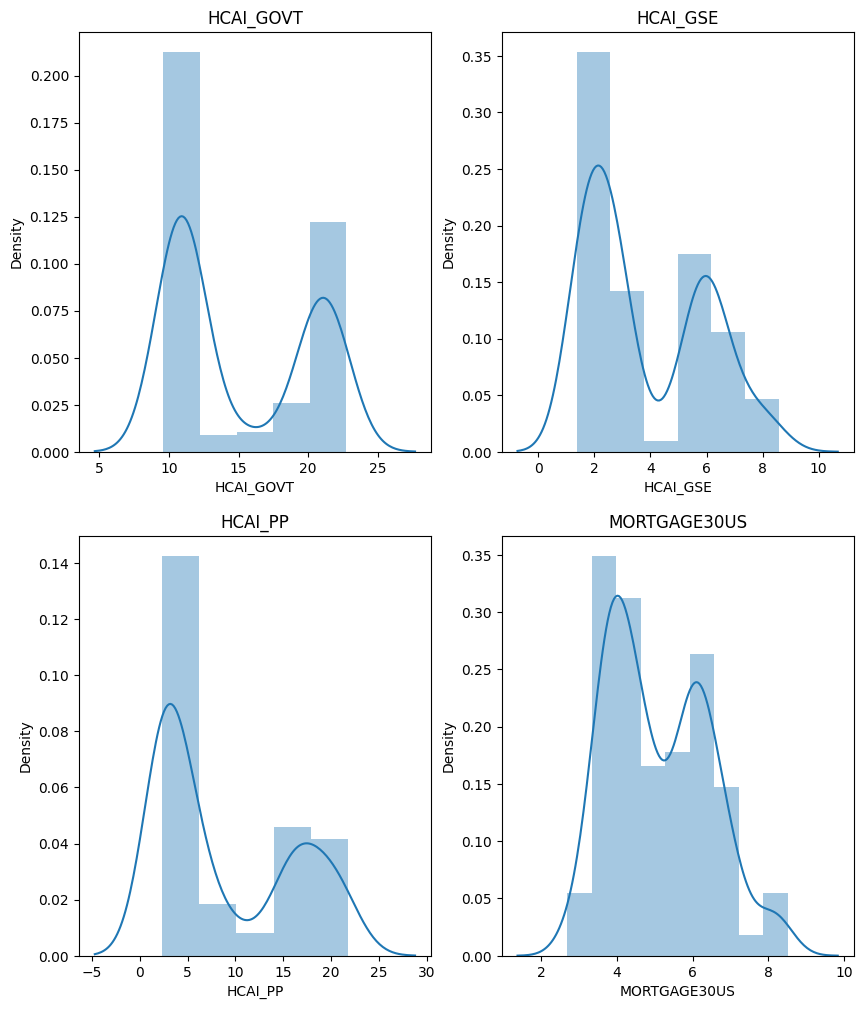

In [22]:
# Distribution plots
figure, axis = plt.subplots(2, 2, figsize=(10,12))

sns.distplot(mordf['HCAI_GOVT'], ax=axis[0, 0])
axis[0, 0].set_title("HCAI_GOVT")

sns.distplot(mordf['HCAI_GSE'], ax=axis[0, 1])
axis[0, 1].set_title("HCAI_GSE")




sns.distplot(mordf['HCAI_PP'], ax=axis[1, 0])
axis[1, 0].set_title("HCAI_PP")

sns.distplot(mordf['MORTGAGE30US'], ax=axis[1, 1])
axis[1, 1].set_title("MORTGAGE30US")

Text(0.5, 1.0, 'MORTGAGE30US')

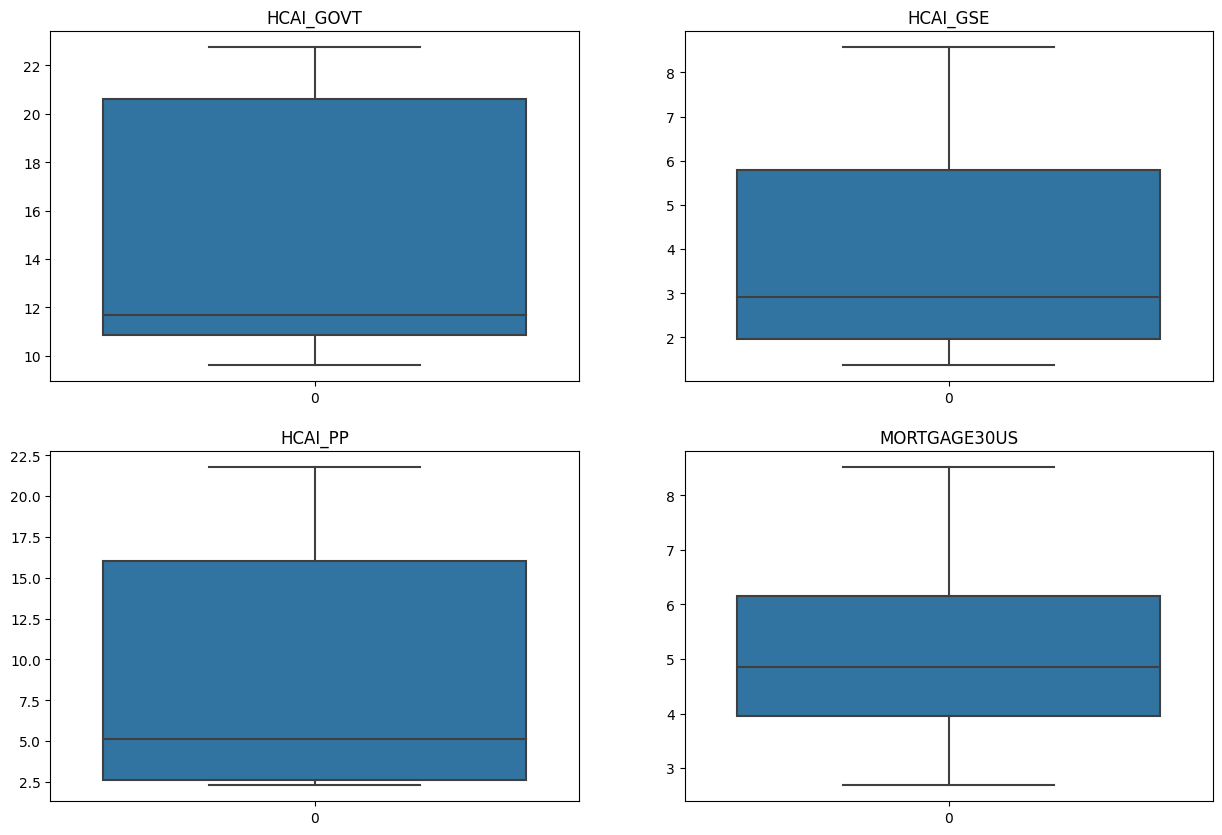

In [161]:
#Box plots
figure, axis = plt.subplots(2, 2, figsize=(15,10))

sns.boxplot(mordf['HCAI_GOVT'], ax=axis[0, 0])
axis[0, 0].set_title("HCAI_GOVT")

sns.boxplot(mordf['HCAI_GSE'], ax=axis[0, 1])
axis[0, 1].set_title("HCAI_GSE")




sns.boxplot(mordf['HCAI_PP'], ax=axis[1, 0])
axis[1, 0].set_title("HCAI_PP")

sns.boxplot(mordf['MORTGAGE30US'], ax=axis[1, 1])
axis[1, 1].set_title("MORTGAGE30US")

In [162]:
 #lag = 96
 #mordf["HCAI_GSE_lag"] = mordf.HCAI_GSE.shift(lag).dropna()
 #mordf["HCAI_GOVT_lag"] = mordf.HCAI_GOVT.shift(lag).dropna()
 #mordf["HCAI_PP_lag"] = mordf.HCAI_PP.shift(lag).dropna()
 #mordf["MORTGAGE30US_lag"] = mordf.MORTGAGE30US.shift(lag).dropna()
 #mordf.corr()

In [163]:
#sns.heatmap(mordf.corr(),annot=True)

target and hcai_govt is 0.23: This indicates a positive correlation of 0.23 between the "target" variable and "hcai_govt." A positive correlation means that as the "target" variable increases, the "hcai_govt" variable tends to increase as well.

target and hcai_gse is 0.43: Similarly, this indicates a stronger positive correlation of 0.43 between the "target" variable and "hcai_gse." When the "target" variable goes up, "hcai_gse" tends to go up as well.

target and hcai_pp is 0.26: This shows a positive correlation of 0.26 between the "target" variable and "hcai_pp."

target and mortgageus30 is -0.046: Here, there is a weak negative correlation of -0.046 between the "target" variable and "mortgageus30." A negative correlation means that as the "target" variable increases, "mortgageus30" tends to decrease slightly.

target and hcai_govtlag is -0.74: This indicates a strong negative correlation of -0.74 between the "target" variable and "hcai_govtlag." A high negative correlation means that as the "target" variable increases, "hcai_govtlag" tends to decrease significantly.

target and hcai_gselag is -0.91: Similarly, this shows a very strong negative correlation of -0.91 between the "target" variable and "hcai_gselag." When the "target" variable goes up, "hcai_gselag" tends to decrease substantially.

target and hcai_pplag is -0.85: This indicates a very strong negative correlation of -0.85 between the "target" variable and "hcai_pplag."

target and mortgageus30lag is -0.69: Here, there is a strong negative correlation of -0.69 between the "target" variable and "mortgageus30lag."

The lag of 96 periods suggests that you've calculated these correlations by comparing the "target" variable with each of these other variables with a time lag of 96 periods. In financial or economic analysis, lagging variables can help identify patterns and relationships over time.

Since your data spans from 2000-01 to 2021-01, these correlations provide insights into how these variables have moved together (or in opposite directions) over that time frame. Keep in mind that correlation does not imply causation; it only indicates the strength and direction of the linear relationship between two variables.







"There exists a high correlation between target and HCAI index with a lag of 96 (8 years), but since we have limited data, we cannot use a lag of 96" suggests that you have identified a strong correlation between the "target" variable and the "HCAI index" when a lag of 96 periods (which corresponds to 8 years) is applied to the data. However, due to limitations in the available dataset, using such a long lag may not be advisable or practical. Let me break this down in more detail:

1. **High Correlation**: You've found that when you apply a lag of 96 periods (8 years) to the data, the correlation between the "target" variable and the "HCAI index" is high. This implies that changes in the "HCAI index" tend to be strongly associated with changes in the "target" variable after an 8-year time lag.

2. **Limited Data**: The dataset you are working with spans from 2000-01 to 2021-01. This is a finite period, and you have data available for this time frame. Using a lag of 96 periods effectively means you are looking at the relationship between these variables with an 8-year delay. However, when you apply such a long lag, you may run into several issues:

   - **Data Sparsity**: With an 8-year lag, you are effectively reducing the amount of data you have for analysis. For example, if you use data from 2000 to predict the "target" variable in 2008, you have fewer data points to work with, which can lead to less reliable results.

   - **Changing Dynamics**: Economic and financial conditions can change significantly over 8 years. What was a strong correlation at one point in time might not hold true in the future due to changing market conditions, policies, and other factors.

   - **Loss of Timeliness**: Depending on your analysis goals, using an 8-year lag might make your predictions or insights less timely and less relevant to current market conditions.

Therefore, the statement is cautioning against using such a long lag of 96 periods because it may not be practical or provide meaningful results given the limitations of the available dataset. It's essential to strike a balance between capturing meaningful correlations and using data that is recent and relevant for decision-making or analysis.

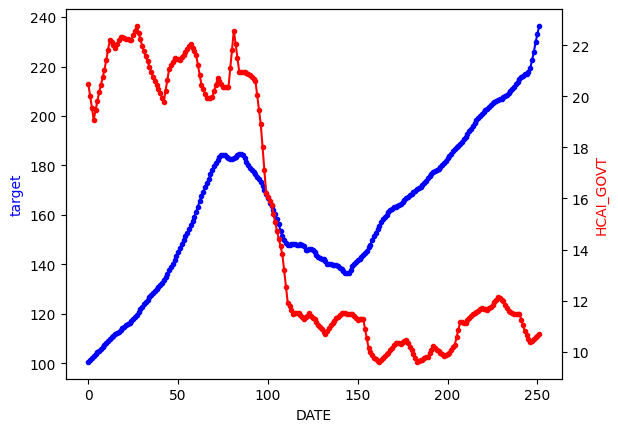

[[ 1.         -0.43353074]
 [-0.43353074  1.        ]]


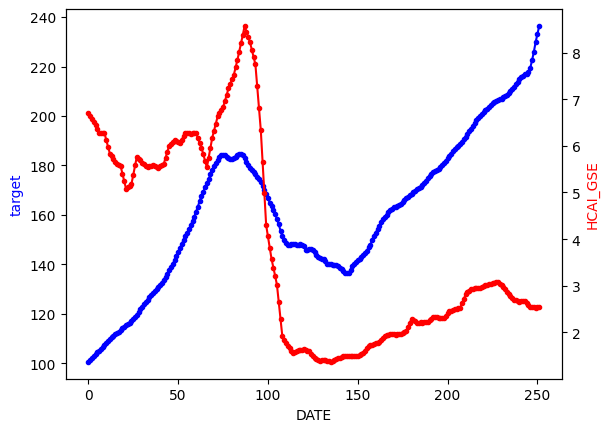

[[ 1.         -0.18077391]
 [-0.18077391  1.        ]]


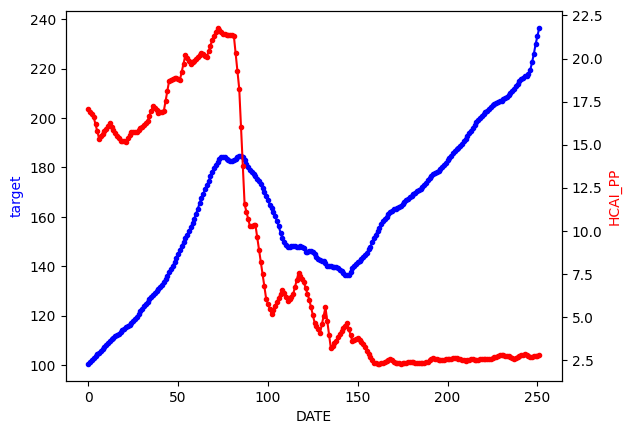

[[ 1.         -0.42100505]
 [-0.42100505  1.        ]]


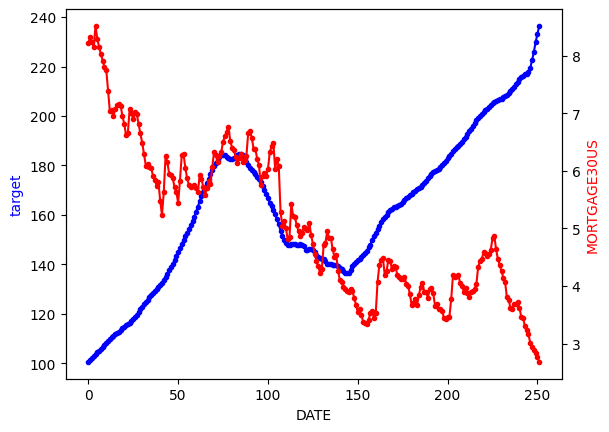

[[ 1.         -0.58727652]
 [-0.58727652  1.        ]]


In [164]:
plot_line(mordf,"target","HCAI_GOVT")
plot_line(mordf,"target","HCAI_GSE")
plot_line(mordf,"target","HCAI_PP")
plot_line(mordf,"target","MORTGAGE30US")

<Axes: >

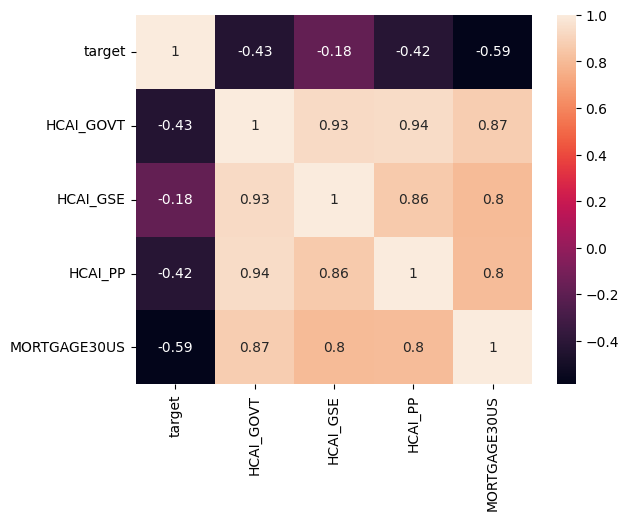

In [165]:
sns.heatmap(mordf.corr(),annot = True)

In [25]:
ecodf = df.copy()
ecodf = ecodf[["target","GDP","CPI","job_gains_private","UNRATE","unrate_construction"]]
ecodf

target        GDP       CPI  job_gains_private  UNRATE  \
0    100.551  10002.179  0.297089            3001.33     4.0   
1    101.339  10084.029  0.592417            3001.33     4.1   
2    102.126  10165.879  0.824499            3001.33     4.0   
3    102.922  10247.720  0.058411            2813.00     3.8   
4    103.677  10271.200  0.116754            2813.00     4.0   
..       ...        ...       ...                ...     ...   
247  222.484  21476.518  0.315321            3601.33     8.4   
248  225.937  21590.608  0.139275            3601.33     7.9   
249  229.888  21704.706  0.041494            2918.67     6.9   
250  233.253  21907.756 -0.061063            2918.67     6.7   
251  236.433  22110.806  0.094148            2918.67     6.7   

     unrate_construction  
0                    9.7  
1                   10.6  
2                    8.7  
3                    5.8  
4                    5.0  
..                   ...  
247                  7.6  
248                  7.1  
249                  6.8  
250                  7.3  
251                  9.6  

[252 rows x 6 columns]

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(ecodf, *['target'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(ecodf, *['GDP'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(ecodf, *['CPI'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(ecodf, *['job_gains_private'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(ecodf, *['target'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(ecodf, *['GDP'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(ecodf, *['CPI'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(ecodf, *['job_gains_private'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(ecodf, *[[['target', 'GDP'], ['GDP', 'CPI'], ['CPI', 'job_gains_private'], ['job_gains_private', 'UNRATE']]], **{})
chart

Text(0.5, 1.0, 'unrate_construction')

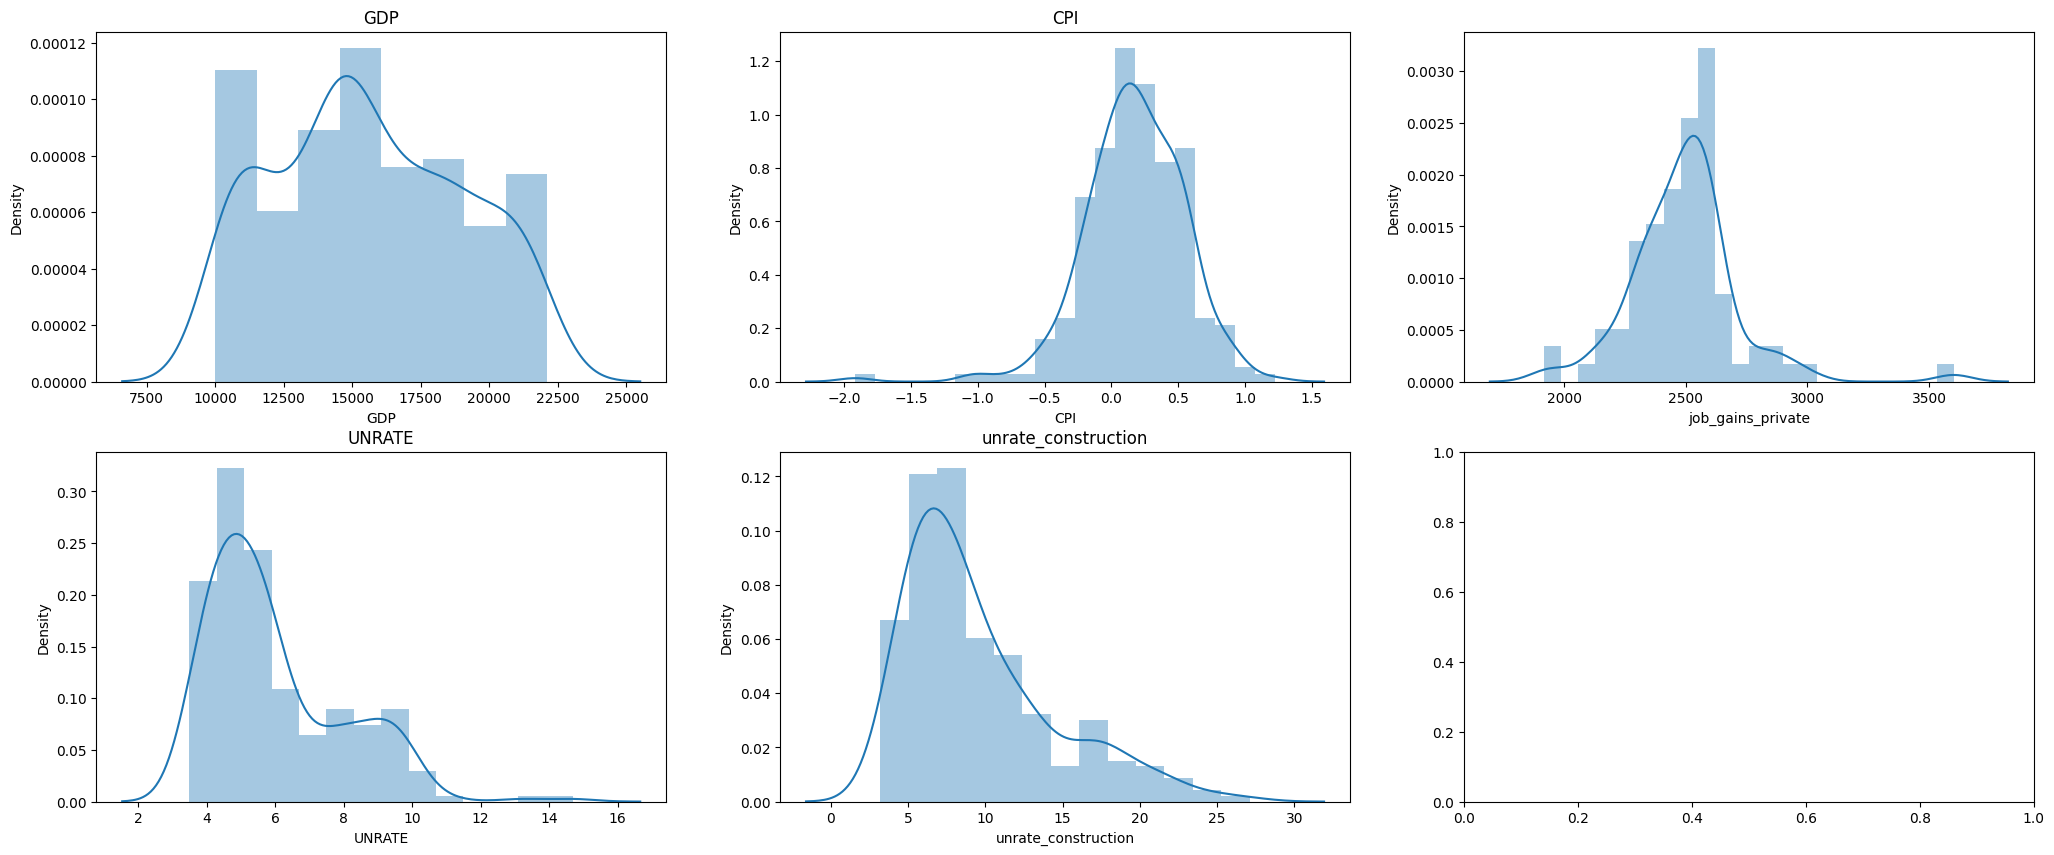

In [26]:
figure, axis = plt.subplots(2, 3, figsize=(25,10))

sns.distplot(ecodf['GDP'], ax=axis[0, 0])
axis[0, 0].set_title("GDP")

sns.distplot(ecodf['CPI'], ax=axis[0, 1])
axis[0, 1].set_title("CPI")


sns.distplot(ecodf['job_gains_private'], ax=axis[0, 2])
axis[1, 0].set_title("job_gains_private")


sns.distplot(ecodf['UNRATE'], ax=axis[1, 0])
axis[1, 0].set_title("UNRATE")

sns.distplot(ecodf['unrate_construction'], ax=axis[1, 1])
axis[1, 1].set_title("unrate_construction")

Text(0.5, 1.0, 'unrate_construction')

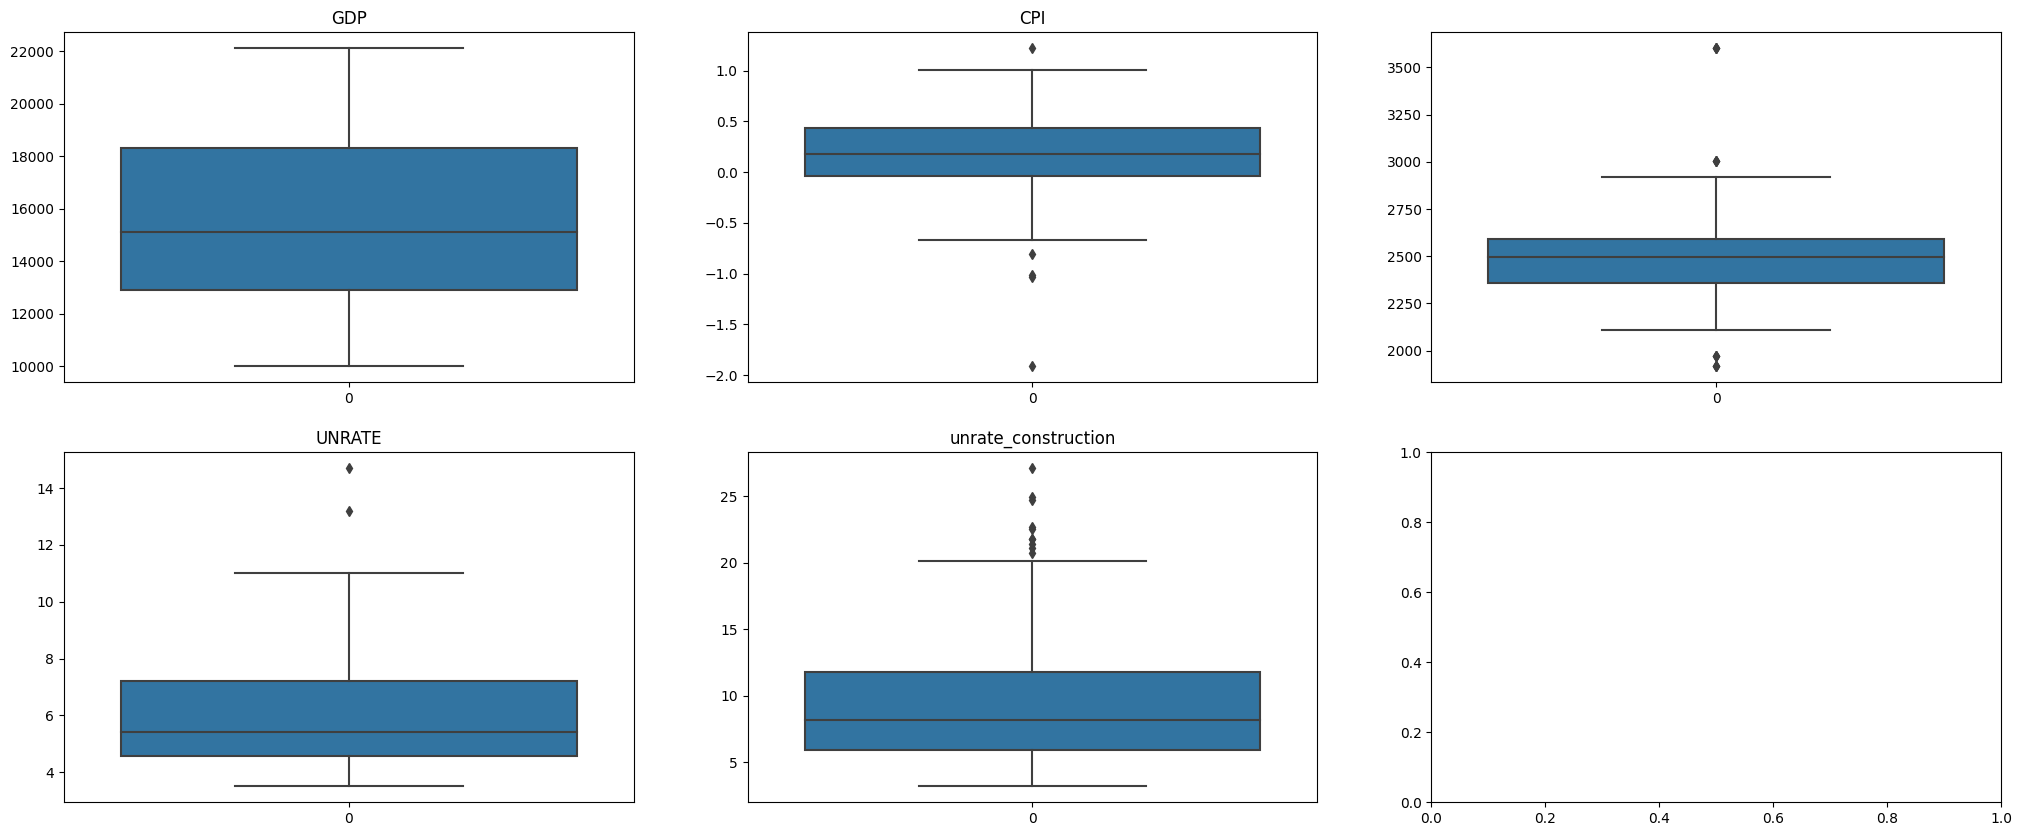

In [27]:
figure, axis = plt.subplots(2, 3, figsize=(25,10))

sns.boxplot(ecodf['GDP'], ax=axis[0, 0])
axis[0, 0].set_title("GDP")

sns.boxplot(ecodf['CPI'], ax=axis[0, 1])
axis[0, 1].set_title("CPI")


sns.boxplot(ecodf['job_gains_private'], ax=axis[0, 2])
axis[1, 0].set_title("job_gains_private")


sns.boxplot(ecodf['UNRATE'], ax=axis[1, 0])
axis[1, 0].set_title("UNRATE")

sns.boxplot(ecodf['unrate_construction'], ax=axis[1, 1])
axis[1, 1].set_title("unrate_construction")

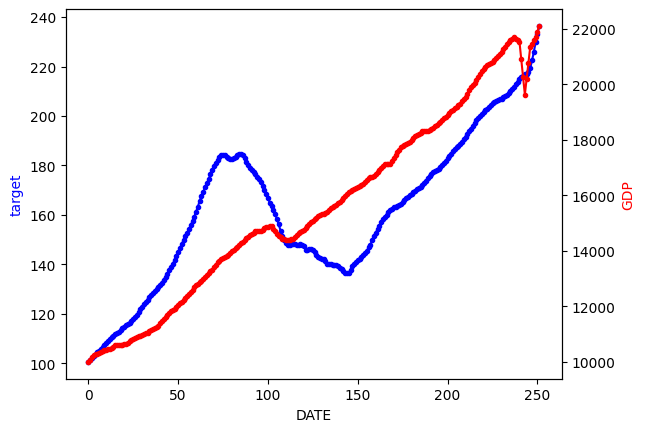

[[1.         0.83595053]
 [0.83595053 1.        ]]


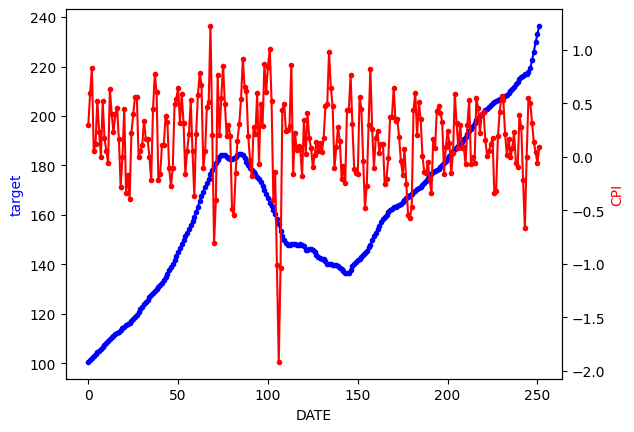

[[ 1.         -0.04141387]
 [-0.04141387  1.        ]]


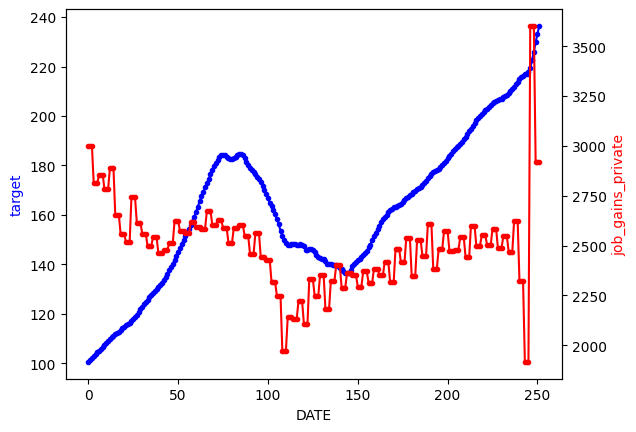

[[1.         0.03285732]
 [0.03285732 1.        ]]


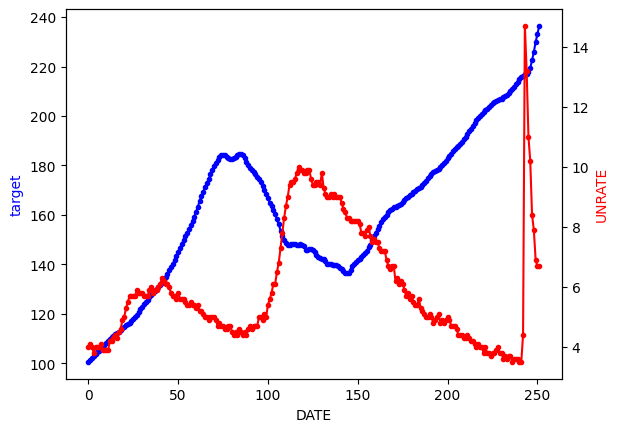

[[ 1.         -0.20362906]
 [-0.20362906  1.        ]]


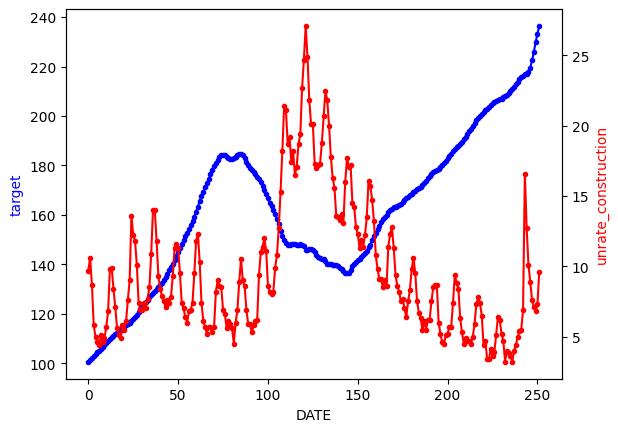

[[ 1.         -0.34786515]
 [-0.34786515  1.        ]]


In [28]:
plot_line(ecodf,"target","GDP")
plot_line(ecodf,"target","CPI")
plot_line(ecodf,"target","job_gains_private")
plot_line(ecodf,"target","UNRATE")
plot_line(ecodf,"target","unrate_construction")

Using log tranformation to handle outliers
Private job gains is number of job gains in the given month, hence we can add a cum sum of the series as a feature

In [29]:
ecodf['unrate_construction'] = np.log(ecodf['unrate_construction'])

In [30]:
ecodf["job_gains_private_cum"] = ecodf["job_gains_private"].cumsum()

In [31]:
np.corrcoef(ecodf["target"],ecodf["job_gains_private_cum"]/ecodf["UNRATE"])

array([[1.        , 0.81662733],
       [0.81662733, 1.        ]])

<Axes: >

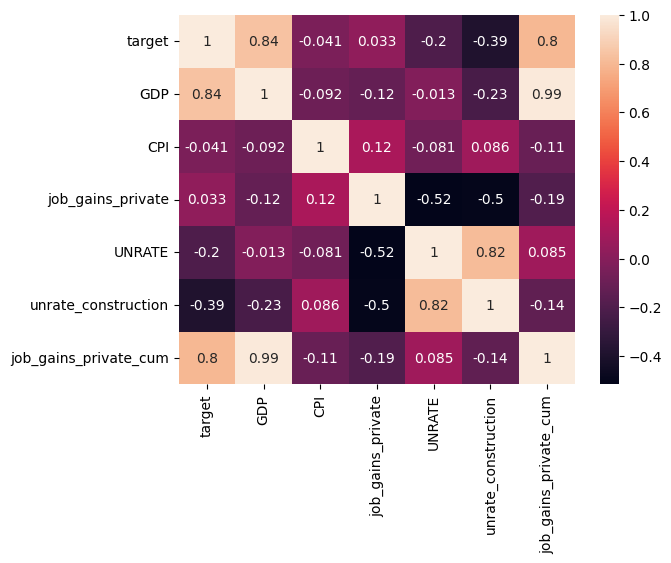

In [32]:
sns.heatmap(ecodf.corr(),annot=True)

We have calculate GDP per capita, hence we can drop GDP
We have also calculated cumulative private job gains per unit unemployment rate
Neither CPI, nor CPI rate is linearly correlated with data
Unemployment rate, private job gains, unemployment rate construction are also highly correlated with each other

<Axes: >

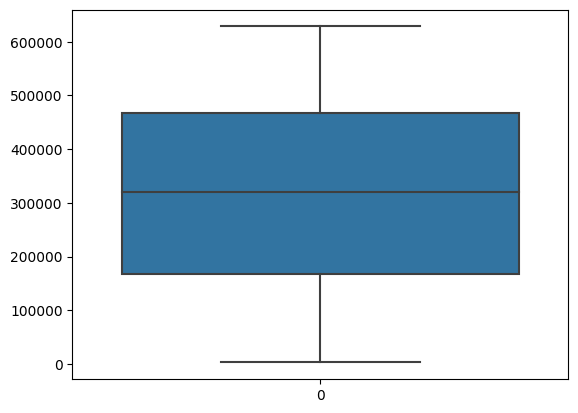

In [33]:
sns.boxplot(ecodf['job_gains_private_cum'])

In [34]:
condf = df.copy()
condf = condf[["target","employees_construction","industrial_production_cement","pvt_owned_house_under_const","residential_const_val","producer_price_index_concrete_brick"]]
condf

target  employees_construction  industrial_production_cement  \
0    100.551                  6752.0                      144.6130   
1    101.339                  6730.0                      143.9732   
2    102.126                  6811.0                      151.6946   
3    102.922                  6794.0                      142.1024   
4    103.677                  6770.0                      143.7562   
..       ...                     ...                           ...   
247  222.484                  7225.0                      103.4103   
248  225.937                  7256.0                      101.6846   
249  229.888                  7310.0                      102.8240   
250  233.253                  7317.0                      104.7750   
251  236.433                  7355.0                      105.7940   

     pvt_owned_house_under_const  residential_const_val  \
0                          991.0               353065.0   
1                          998.0               351933.0   
2                          988.0               353452.0   
3                          989.0               356188.0   
4                          985.0               349907.0   
..                           ...                    ...   
247                       1213.0               641103.0   
248                       1218.0               662353.0   
249                       1228.0               684180.0   
250                       1248.0               702717.0   
251                       1262.0               725025.0   

     producer_price_index_concrete_brick  
0                                  143.2  
1                                  143.7  
2                                  143.7  
3                                  143.7  
4                                  149.2  
..                                   ...  
247                                261.4  
248                                263.3  
249                                263.3  
250                                263.3  
251                                263.3  

[252 rows x 6 columns]

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(condf, *['target'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(condf, *['employees_construction'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(condf, *['industrial_production_cement'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(condf, *['pvt_owned_house_under_const'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(condf, *['target'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(condf, *['employees_construction'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(condf, *['industrial_production_cement'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(condf, *['pvt_owned_house_under_const'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(condf, *[[['target', 'employees_construction'], ['employees_construction', 'industrial_production_cement'], ['industrial_production_cement', 'pvt_owned_house_under_const'], ['pvt_owned_house_under_const', 'residential_const_val']]], **{})
chart

Text(0.5, 1.0, 'target')

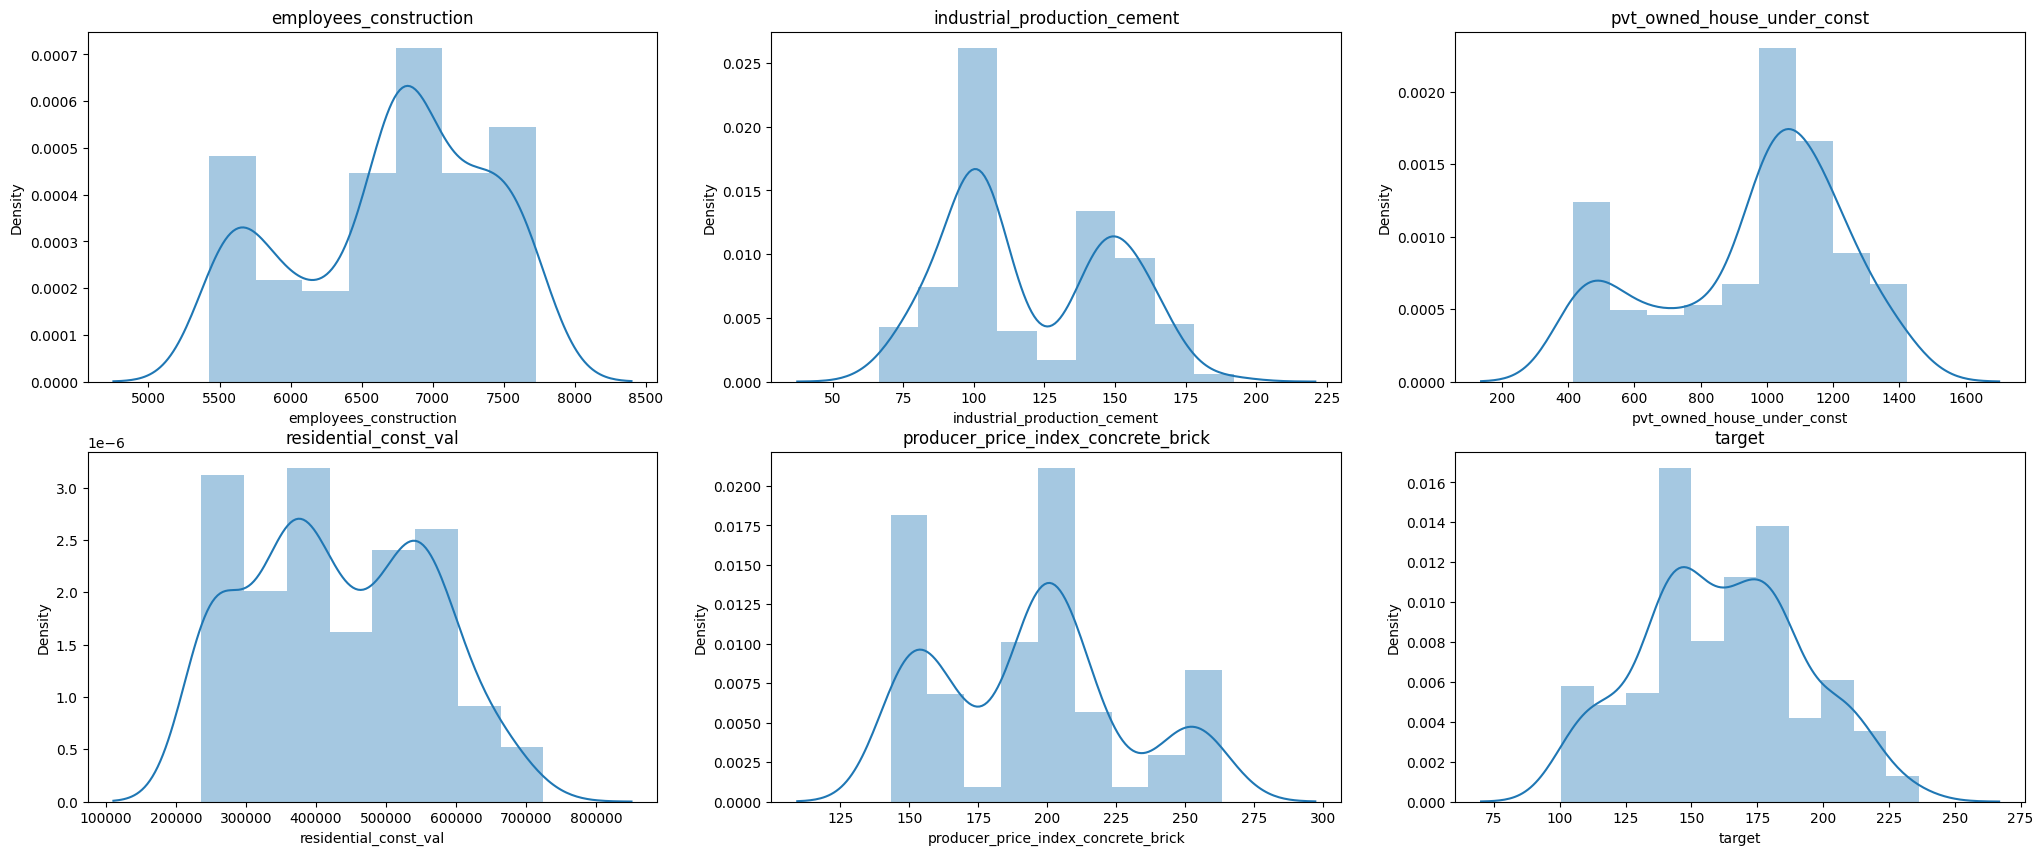

In [35]:
# Suppress the warning
warnings.filterwarnings("ignore", category=UserWarning)

# Distribution plots
figure, axis = plt.subplots(2, 3, figsize=(25,10))

sns.distplot(condf['employees_construction'], ax=axis[0, 0])
axis[0, 0].set_title("employees_construction")

sns.distplot(condf['industrial_production_cement'], ax=axis[0, 1])
axis[0, 1].set_title("industrial_production_cement")

sns.distplot(condf['pvt_owned_house_under_const'], ax=axis[0, 2])
axis[0, 2].set_title("pvt_owned_house_under_const")



sns.distplot(condf['residential_const_val'], ax=axis[1, 0])
axis[1, 0].set_title("residential_const_val")

sns.distplot(condf['producer_price_index_concrete_brick'], ax=axis[1, 1])
axis[1, 1].set_title("producer_price_index_concrete_brick")

sns.distplot(condf['target'], ax=axis[1, 2])
axis[1, 2].set_title("target")

Text(0.5, 1.0, 'target')

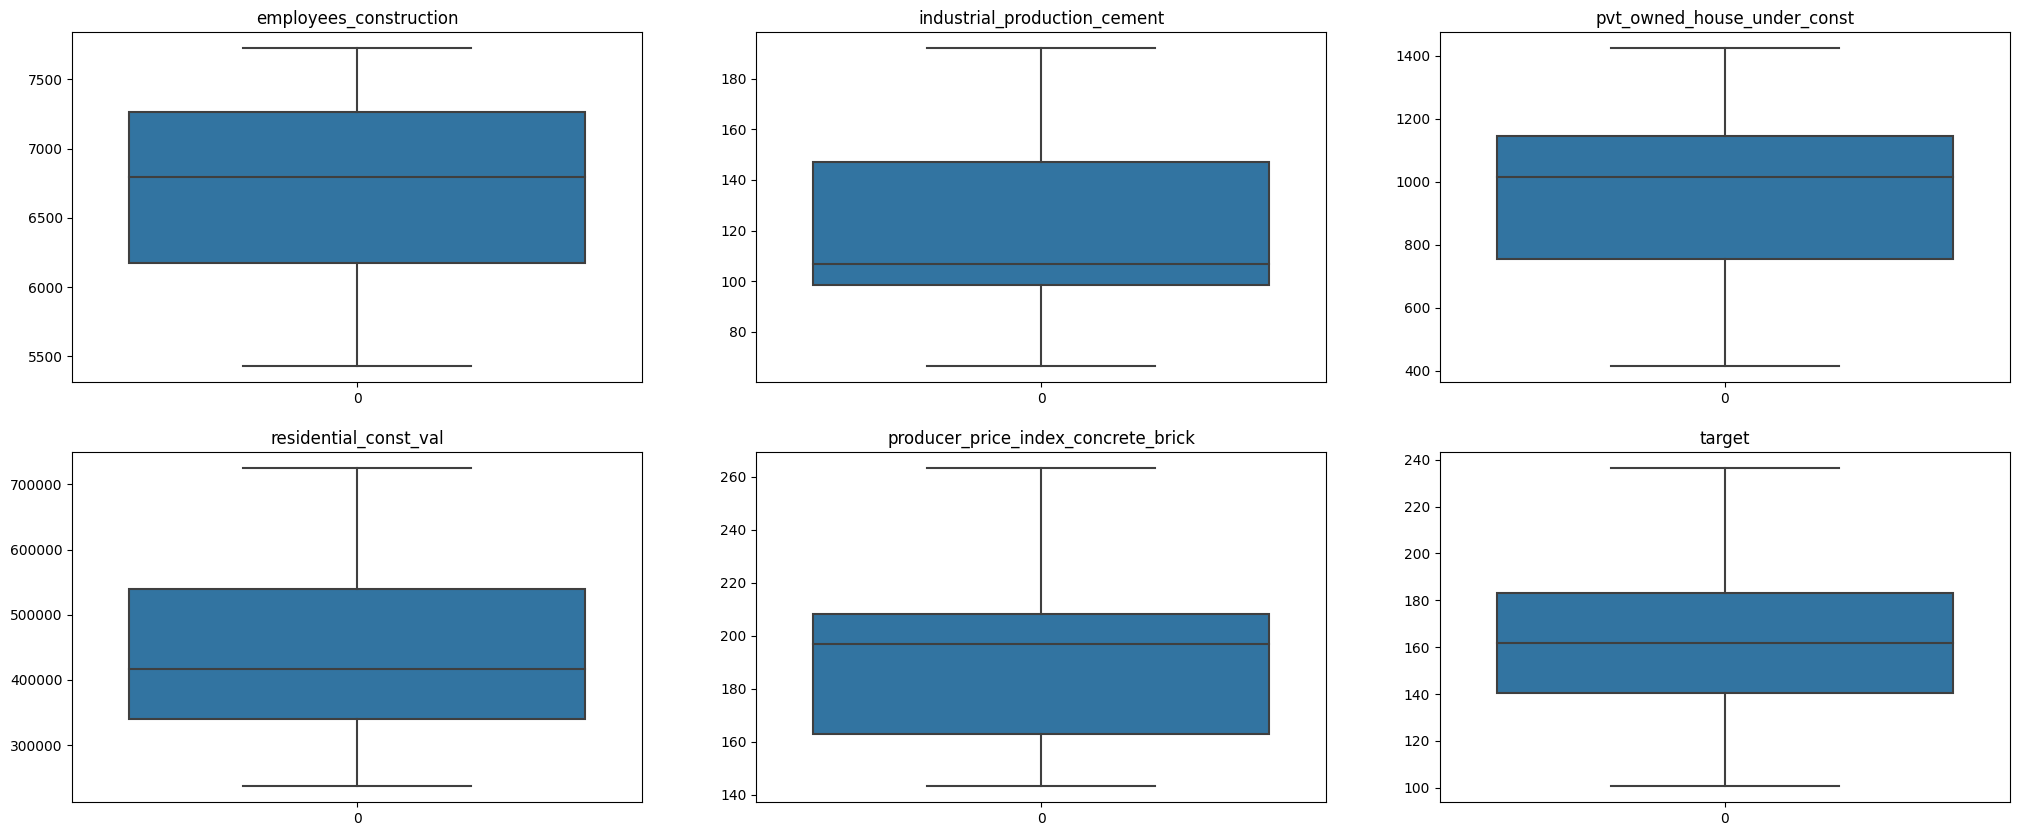

In [36]:
figure, axis = plt.subplots(2, 3, figsize=(25,10))

sns.boxplot(condf['employees_construction'], ax=axis[0, 0])
axis[0, 0].set_title("employees_construction")

sns.boxplot(condf['industrial_production_cement'], ax=axis[0, 1])
axis[0, 1].set_title("industrial_production_cement")

sns.boxplot(condf['pvt_owned_house_under_const'], ax=axis[0, 2])
axis[0, 2].set_title("pvt_owned_house_under_const")



sns.boxplot(condf['residential_const_val'], ax=axis[1, 0])
axis[1, 0].set_title("residential_const_val")

sns.boxplot(condf['producer_price_index_concrete_brick'], ax=axis[1, 1])
axis[1, 1].set_title("producer_price_index_concrete_brick")

sns.boxplot(condf['target'], ax=axis[1, 2])
axis[1, 2].set_title("target")

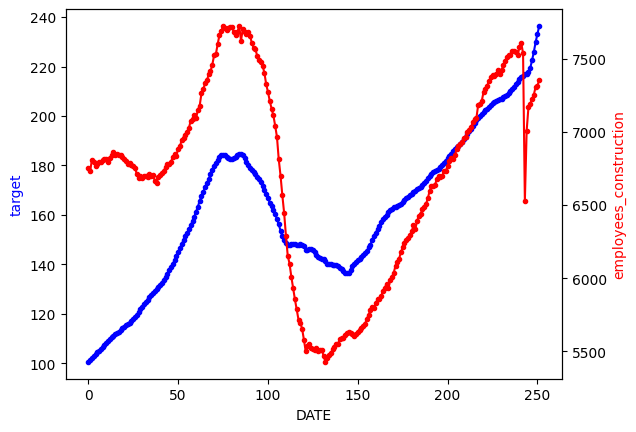

[[1.         0.50132948]
 [0.50132948 1.        ]]


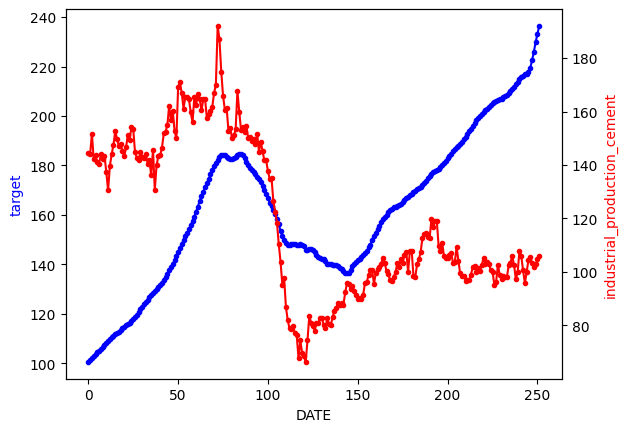

[[ 1.         -0.19609908]
 [-0.19609908  1.        ]]


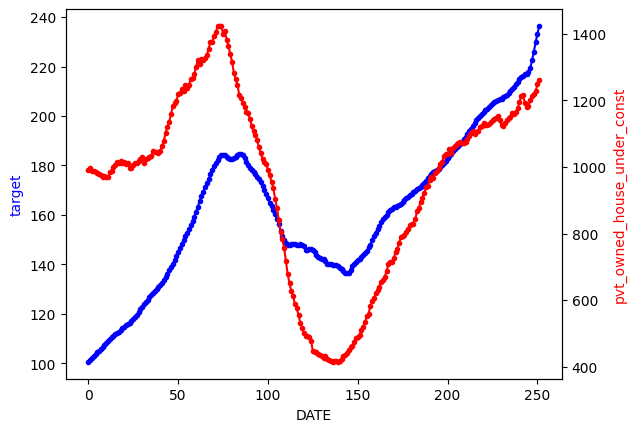

[[1.         0.43020344]
 [0.43020344 1.        ]]


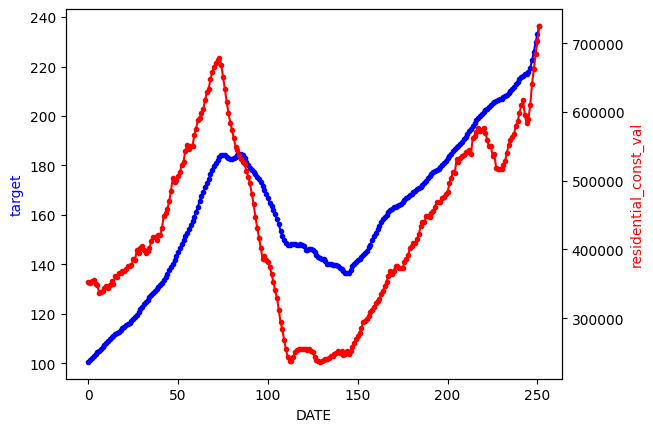

[[1.         0.69708155]
 [0.69708155 1.        ]]


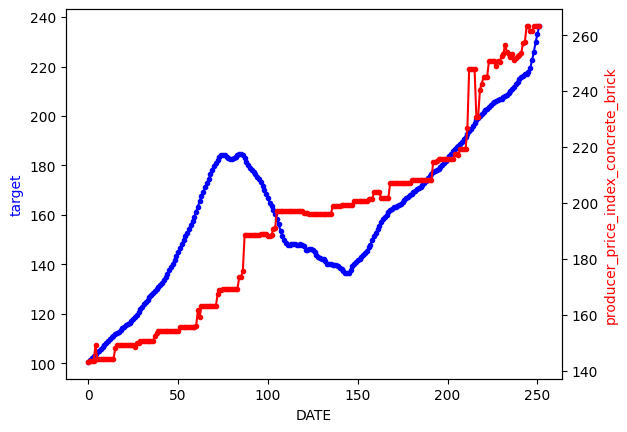

[[1.         0.80295467]
 [0.80295467 1.        ]]


In [37]:
plot_line(condf,"target","employees_construction")
plot_line(condf,"target","industrial_production_cement")
plot_line(condf,"target","pvt_owned_house_under_const")
plot_line(condf,"target","residential_const_val")
plot_line(condf,"target","producer_price_index_concrete_brick")

In [38]:
condf["construction_cost"] = condf["residential_const_val"] / condf["pvt_owned_house_under_const"]

In [39]:
condf["employees_construction_cum"] = condf["employees_construction"].cumsum()

condf["residential_const_val_cum"] = condf["residential_const_val"].cumsum()

condf["pvt_owned_house_under_const_cum"] = condf["pvt_owned_house_under_const"].cumsum()

condf["industrial_production_cement_cum"] = condf["industrial_production_cement"].cumsum()


condf["construction_cost_cum"] = condf["construction_cost"].cumsum()

In [40]:
condf

target  employees_construction  industrial_production_cement  \
0    100.551                  6752.0                      144.6130   
1    101.339                  6730.0                      143.9732   
2    102.126                  6811.0                      151.6946   
3    102.922                  6794.0                      142.1024   
4    103.677                  6770.0                      143.7562   
..       ...                     ...                           ...   
247  222.484                  7225.0                      103.4103   
248  225.937                  7256.0                      101.6846   
249  229.888                  7310.0                      102.8240   
250  233.253                  7317.0                      104.7750   
251  236.433                  7355.0                      105.7940   

     pvt_owned_house_under_const  residential_const_val  \
0                          991.0               353065.0   
1                          998.0               351933.0   
2                          988.0               353452.0   
3                          989.0               356188.0   
4                          985.0               349907.0   
..                           ...                    ...   
247                       1213.0               641103.0   
248                       1218.0               662353.0   
249                       1228.0               684180.0   
250                       1248.0               702717.0   
251                       1262.0               725025.0   

     producer_price_index_concrete_brick  construction_cost  \
0                                  143.2         356.271443   
1                                  143.7         352.638277   
2                                  143.7         357.744939   
3                                  143.7         360.149646   
4                                  149.2         355.235533   
..                                   ...                ...   
247                                261.4         528.526793   
248                                263.3         543.803777   
249                                263.3         557.149837   
250                                263.3         563.074519   
251                                263.3         574.504754   

     employees_construction_cum  residential_const_val_cum  \
0                        6752.0                   353065.0   
1                       13482.0                   704998.0   
2                       20293.0                  1058450.0   
3                       27087.0                  1414638.0   
4                       33857.0                  1764545.0   
..                          ...                        ...   
247                   1659934.0                106211923.0   
248                   1667190.0                106874276.0   
249                   1674500.0                107558456.0   
250                   1681817.0                108261173.0   
251                   1689172.0                108986198.0   

     pvt_owned_house_under_const_cum  industrial_production_cement_cum  \
0                              991.0                          144.6130   
1                             1989.0                          288.5862   
2                             2977.0                          440.2808   
3                             3966.0                          582.3832   
4                             4951.0                          726.1394   
..                               ...                               ...   
247                         235292.0                        29800.3036   
248                         236510.0                        29901.9882   
249                         237738.0                        30004.8122   
250                         238986.0                        30109.5872   
251                         240248.0                        30215.3812   

     construction_cost_cum  
0               356.271443  
1      

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(condf, *['target'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(condf, *['employees_construction'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(condf, *['industrial_production_cement'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(condf, *['pvt_owned_house_under_const'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(condf, *['target'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(condf, *['employees_construction'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(condf, *['industrial_production_cement'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(condf, *['pvt_owned_house_under_const'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(condf, *[[['target', 'employees_construction'], ['employees_construction', 'industrial_production_cement'], ['industrial_production_cement', 'pvt_owned_house_under_const'], ['pvt_owned_house_under_const', 'residential_const_val']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(condf, *['employees_construction_cum', 'target', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(condf, *['employees_construction_cum', 'employees_construction', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(condf, *['employees_construction_cum', 'industrial_production_cement', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(condf, *['employees_construction_cum', 'pvt_owned_house_under_const', None], **{})
chart

<Axes: >

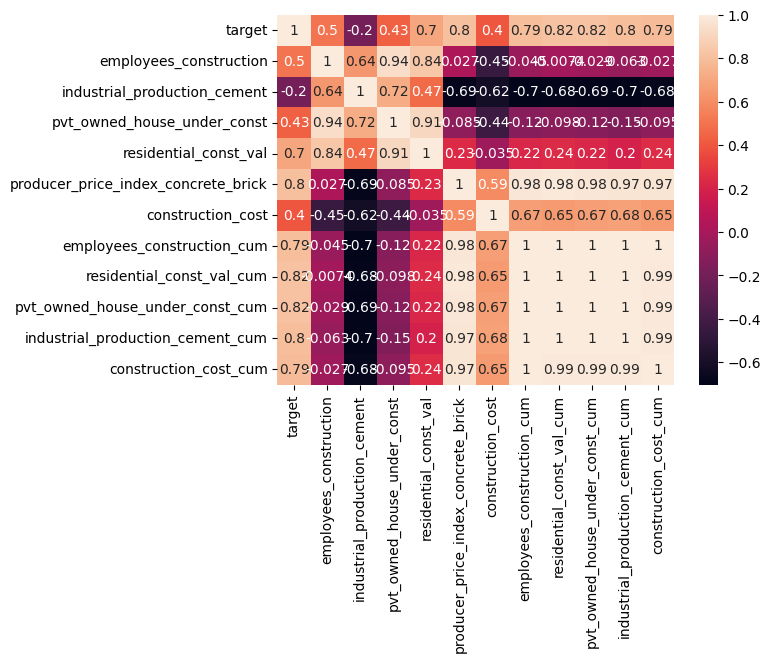

In [41]:
sns.heatmap(condf.corr(),annot=True)

In [42]:
x = 12
condf["employees_construction_cum"] = condf["employees_construction"].rolling(window=x).sum()

condf["residential_const_val_cum"] = condf["residential_const_val"].rolling(window=x).sum()

condf["pvt_owned_house_under_const_cum"] = condf["pvt_owned_house_under_const"].rolling(window=x).sum()

condf["industrial_production_cement_cum"] = condf["industrial_production_cement"].rolling(window=x).sum()

condf["construction_cost_cum"] = condf["construction_cost"].rolling(window=x).sum()

<Axes: >

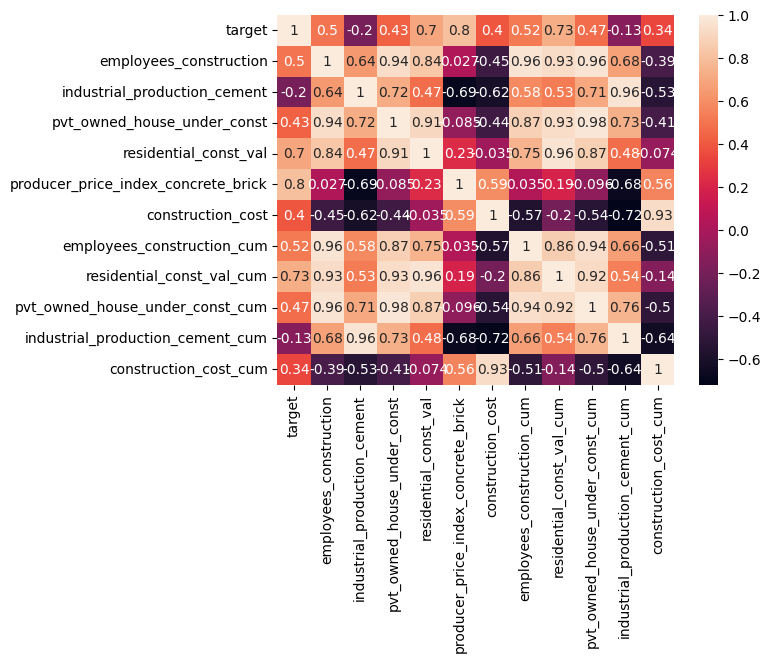

In [43]:
sns.heatmap(condf.corr(),annot=True)

Construction variables are highly correlated with each other
The rolling sum of 12 months of residial construction value is the most correlated with the target

<Axes: >

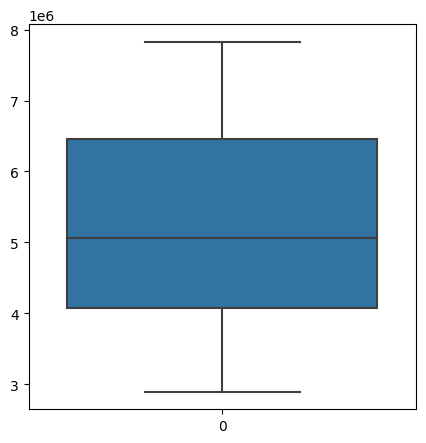

In [44]:
figure, axis = plt.subplots(1,1, figsize=(5,5))

sns.boxplot(condf['residential_const_val_cum'],)

In [45]:
houdf = df.copy()

houdf = houdf[["target","houses-for-sale-to-sold","homeownership","house_units_completed","retail_sales_home_furnishing_stores"]]
houdf

target  houses-for-sale-to-sold  homeownership  house_units_completed  \
0    100.551                      4.3          67.10                 1574.0   
1    101.339                      4.3          67.13                 1677.0   
2    102.126                      4.3          67.16                 1704.0   
3    102.922                      4.4          67.20                 1610.0   
4    103.677                      4.4          67.37                 1682.0   
..       ...                      ...            ...                    ...   
247  222.484                      3.3          66.87                 1238.0   
248  225.937                      3.4          66.34                 1446.0   
249  229.888                      3.3          65.80                 1370.0   
250  233.253                      4.0          65.73                 1240.0   
251  236.433                      4.1          65.66                 1386.0   

     retail_sales_home_furnishing_stores  
0                                 7484.0  
1                                 7548.0  
2                                 7599.0  
3                                 7729.0  
4                                 7673.0  
..                                   ...  
247                              10622.0  
248                              10737.0  
249                              10594.0  
250                              10452.0  
251                              10673.0  

[252 rows x 5 columns]

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(houdf, *['target'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(houdf, *['houses-for-sale-to-sold'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(houdf, *['homeownership'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(houdf, *['house_units_completed'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(houdf, *['target'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(houdf, *['houses-for-sale-to-sold'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(houdf, *['homeownership'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(houdf, *['house_units_completed'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(houdf, *[[['target', 'houses-for-sale-to-sold'], ['houses-for-sale-to-sold', 'homeownership'], ['homeownership', 'house_units_completed'], ['house_units_completed', 'retail_sales_home_furnishing_stores']]], **{})
chart

Text(0.5, 1.0, 'retail_sales_home_furnishing_stores')

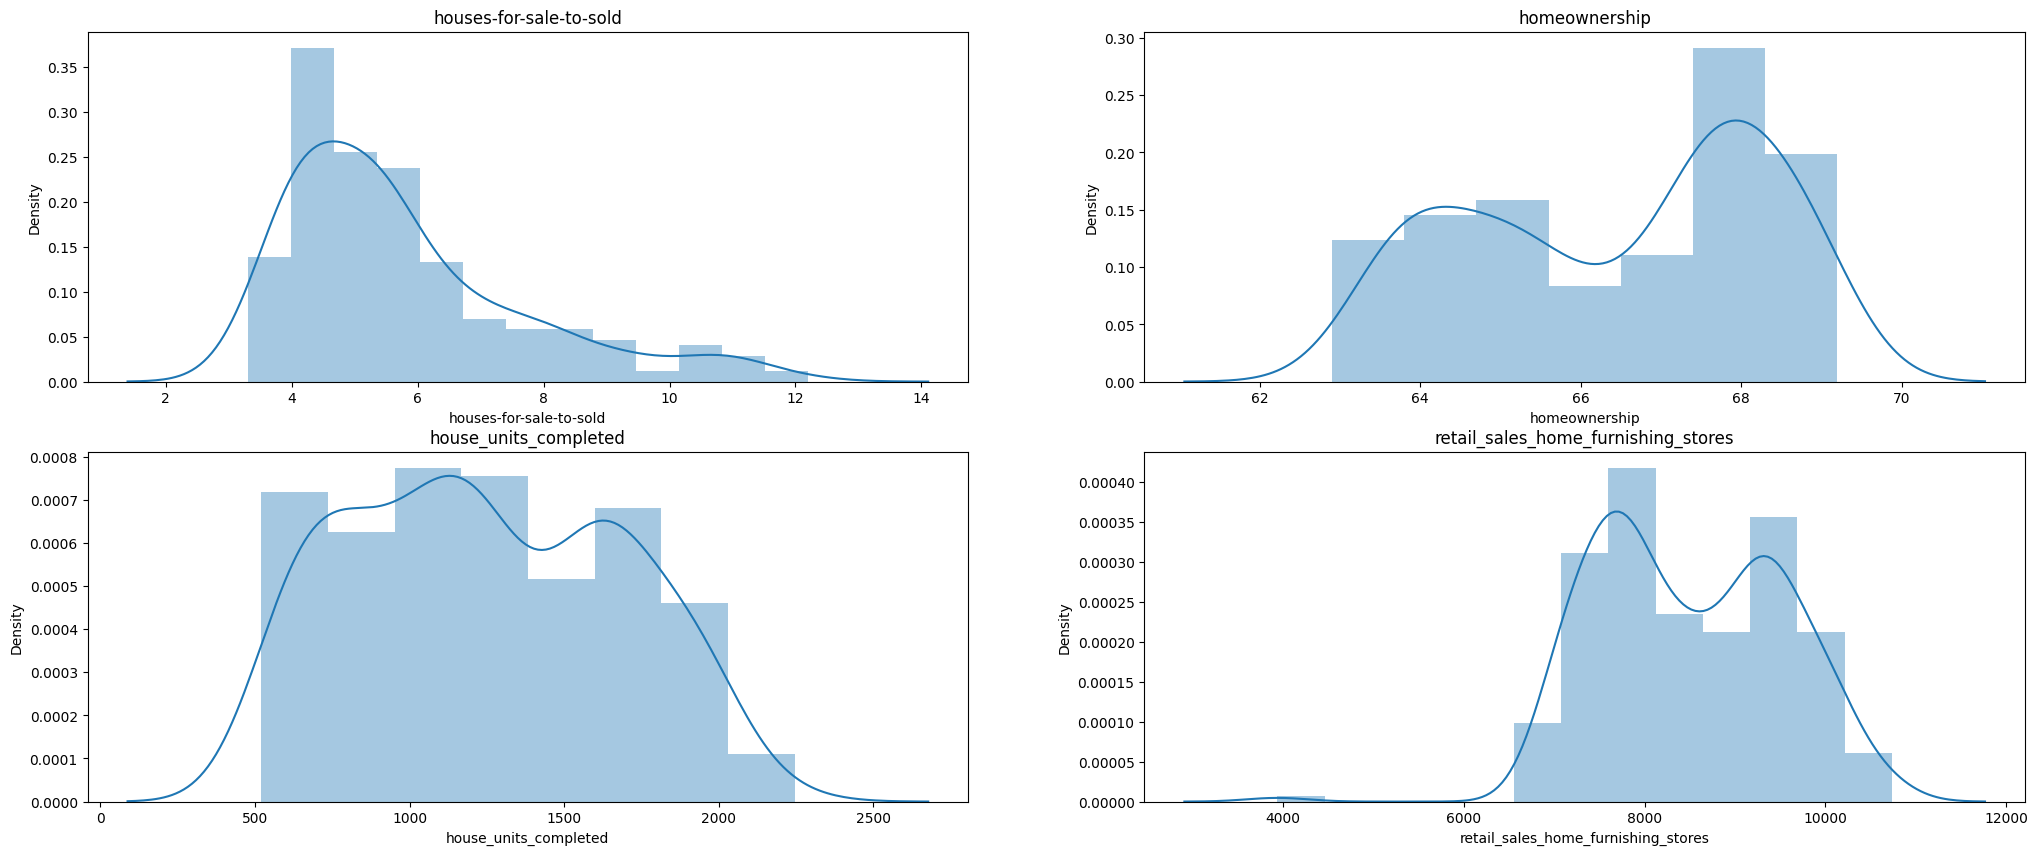

In [46]:
# Distribution plots
figure, axis = plt.subplots(2, 2, figsize=(25,10))

sns.distplot(houdf['houses-for-sale-to-sold'], ax=axis[0, 0])
axis[0, 0].set_title("houses-for-sale-to-sold")

sns.distplot(houdf['homeownership'], ax=axis[0, 1])
axis[0, 1].set_title("homeownership")



sns.distplot(houdf['house_units_completed'], ax=axis[1, 0])
axis[1, 0].set_title("house_units_completed")

sns.distplot(houdf['retail_sales_home_furnishing_stores'], ax=axis[1, 1])
axis[1, 1].set_title("retail_sales_home_furnishing_stores")

Text(0.5, 1.0, 'retail_sales_home_furnishing_stores')

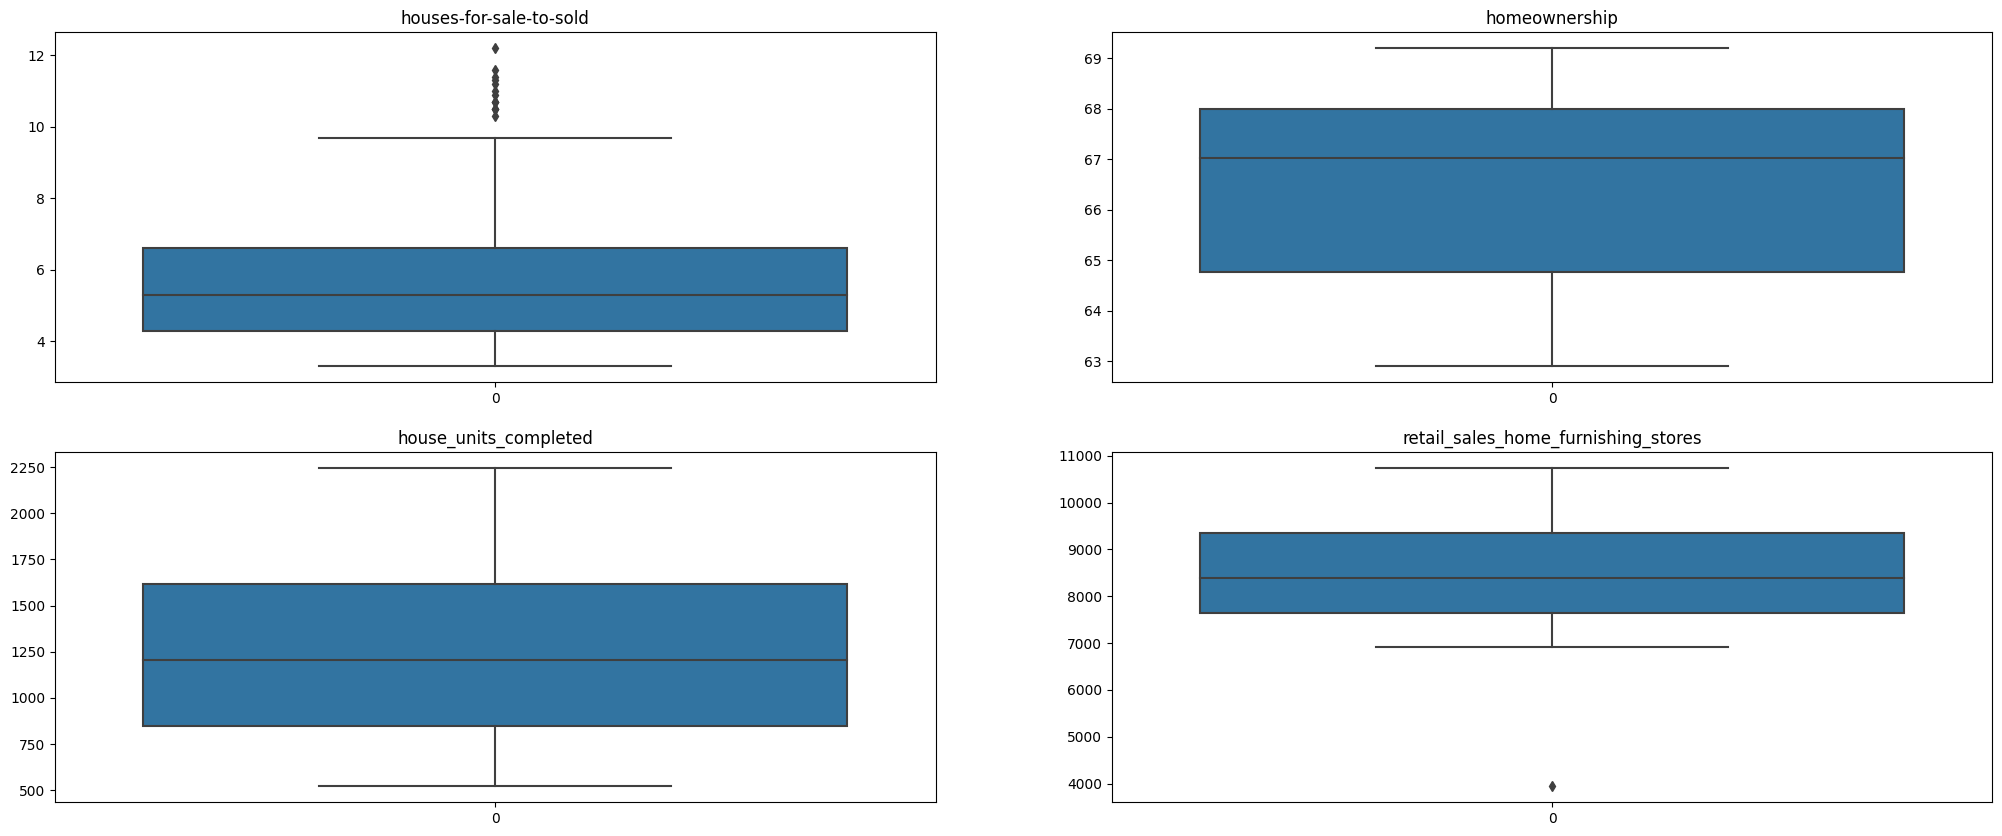

In [47]:
# Box plots
figure, axis = plt.subplots(2, 2, figsize=(25,10))

sns.boxplot(houdf['houses-for-sale-to-sold'], ax=axis[0, 0])
axis[0, 0].set_title("houses-for-sale-to-sold")

sns.boxplot(houdf['homeownership'], ax=axis[0, 1])
axis[0, 1].set_title("homeownership")



sns.boxplot(houdf['house_units_completed'], ax=axis[1, 0])
axis[1, 0].set_title("house_units_completed")

sns.boxplot(houdf['retail_sales_home_furnishing_stores'], ax=axis[1, 1])
axis[1, 1].set_title("retail_sales_home_furnishing_stores")

<Axes: >

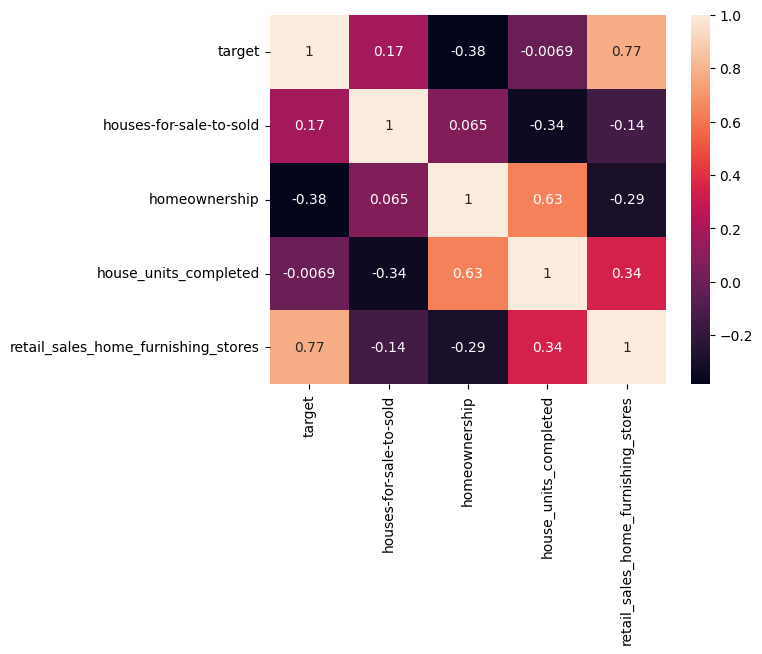

In [48]:
sns.heatmap(houdf.corr(),annot=True)

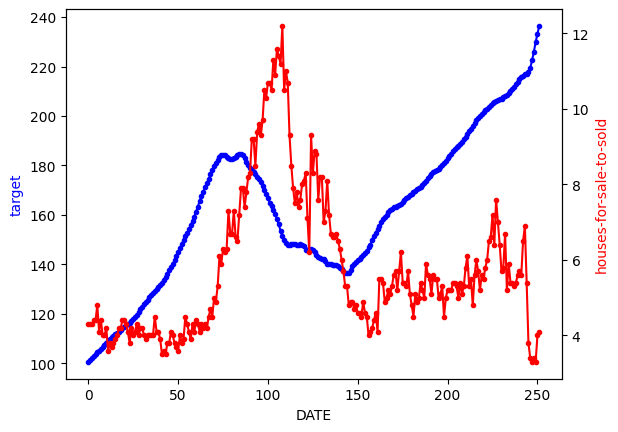

[[1.         0.17359411]
 [0.17359411 1.        ]]


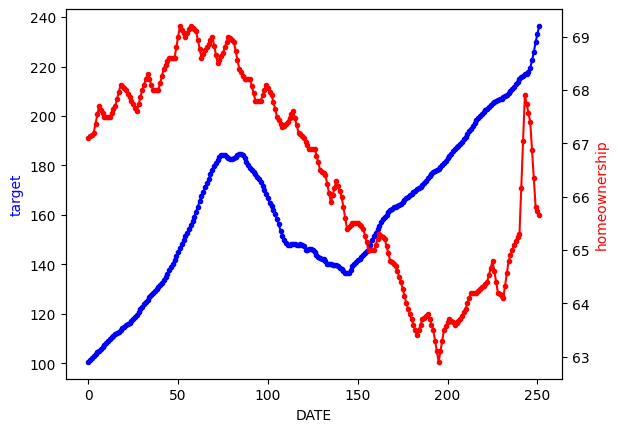

[[ 1.         -0.38485381]
 [-0.38485381  1.        ]]


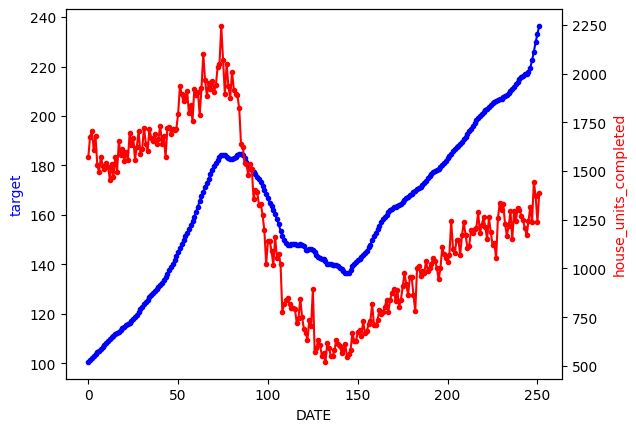

[[ 1.        -0.0069464]
 [-0.0069464  1.       ]]


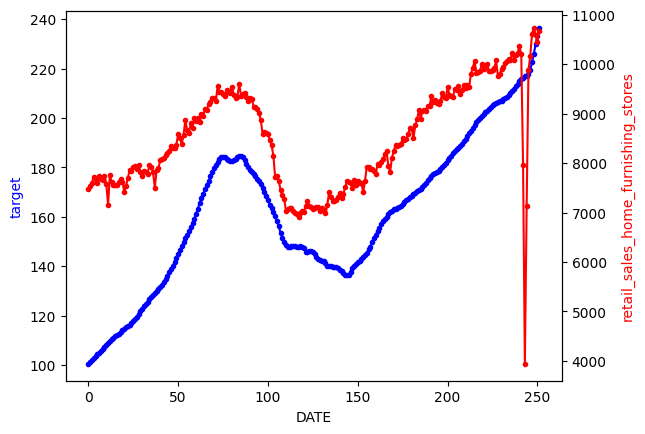

[[1.         0.77439246]
 [0.77439246 1.        ]]


In [49]:
plot_line(houdf,"target","houses-for-sale-to-sold")
plot_line(houdf,"target","homeownership")
plot_line(houdf,"target","house_units_completed")
plot_line(houdf,"target","retail_sales_home_furnishing_stores")


In [50]:
x = 12
houdf["houses-for-sale-to-sold_cum"] = houdf["houses-for-sale-to-sold"].rolling(window=x).sum()

houdf["house_units_completed_cum"] = houdf["house_units_completed"].rolling(window=x).sum()

houdf["retail_sales_home_furnishing_stores_cum"] = houdf["retail_sales_home_furnishing_stores"].rolling(window=x).sum()

houdf["homeownership-cum"] = houdf["homeownership"].rolling(window=x).sum()

<Axes: >

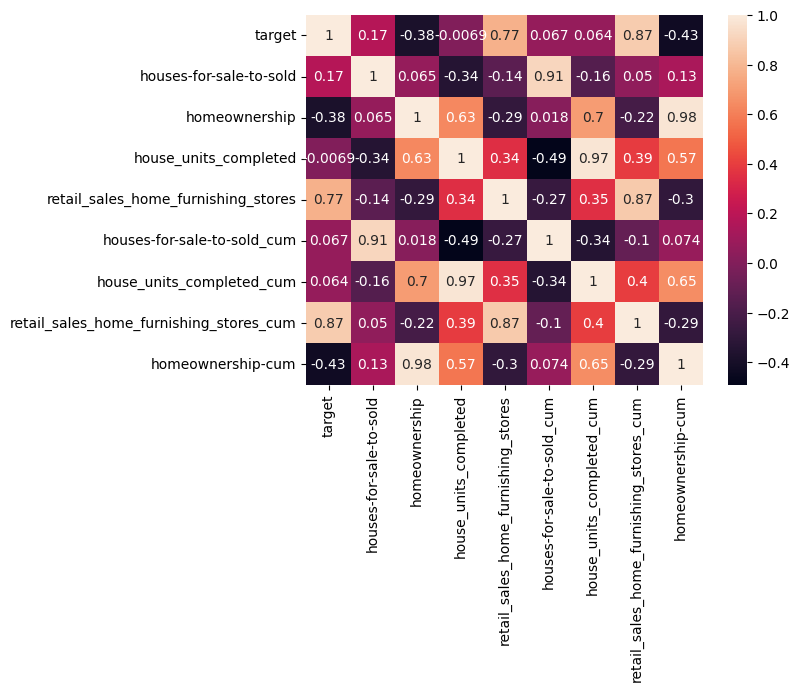

In [51]:
sns.heatmap(houdf.corr(),annot=True)

In [52]:
infdf = df.copy()
infdf = infdf[['target','PERMIT','nonresidential_const_val']]

infdf

target  PERMIT  nonresidential_const_val
0    100.551  1727.0                  247213.0
1    101.339  1692.0                  265200.0
2    102.126  1651.0                  268020.0
3    102.922  1597.0                  264832.0
4    103.677  1543.0                  275989.0
..       ...     ...                       ...
247  222.484  1564.0                  484271.0
248  225.937  1643.0                  483009.0
249  229.888  1622.0                  486381.0
250  233.253  1713.0                  479857.0
251  236.433  1760.0                  479213.0

[252 rows x 3 columns]

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(infdf, *['target'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(infdf, *['PERMIT'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(infdf, *['nonresidential_const_val'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(infdf, *['target'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(infdf, *['PERMIT'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(infdf, *['nonresidential_const_val'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(infdf, *[[['target', 'PERMIT'], ['PERMIT', 'nonresidential_const_val']]], **{})
chart

Text(0.5, 1.0, 'nonresidential_const_val')

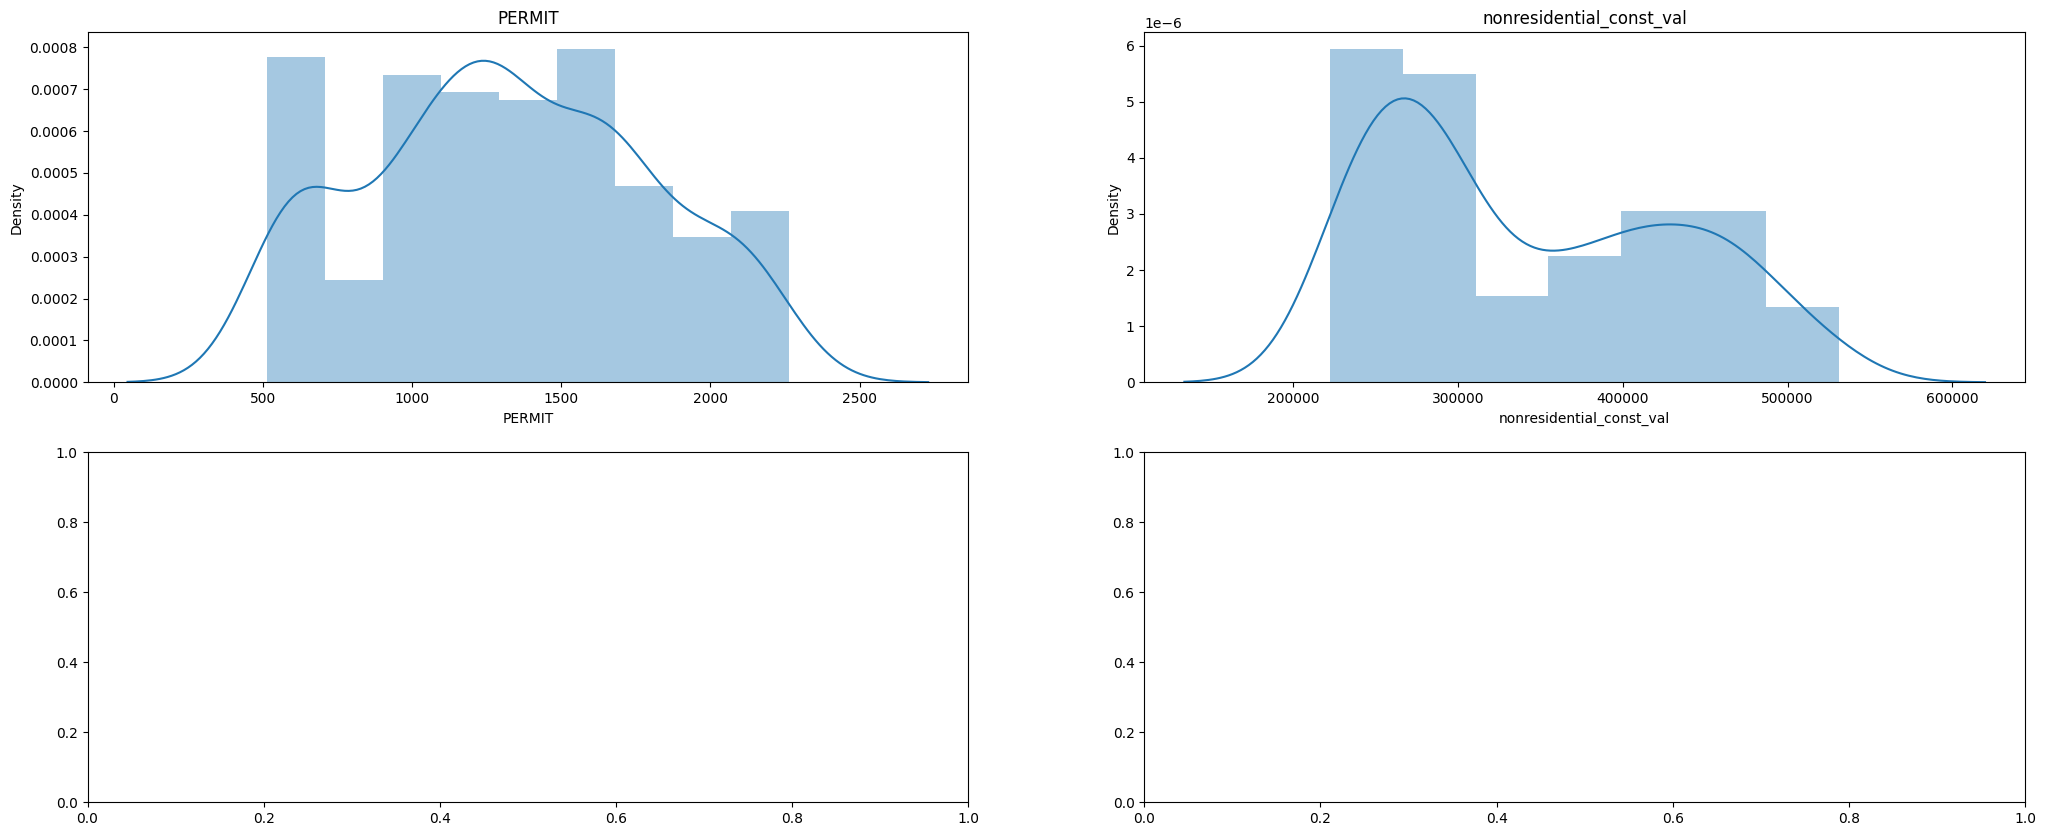

In [53]:
# Distribution plots
figure, axis = plt.subplots(2, 2, figsize=(25,10))

sns.distplot(infdf['PERMIT'], ax=axis[0, 0])
axis[0, 0].set_title("PERMIT")

sns.distplot(infdf['nonresidential_const_val'], ax=axis[0, 1])
axis[0, 1].set_title("nonresidential_const_val")




Text(0.5, 1.0, 'nonresidential_const_val')

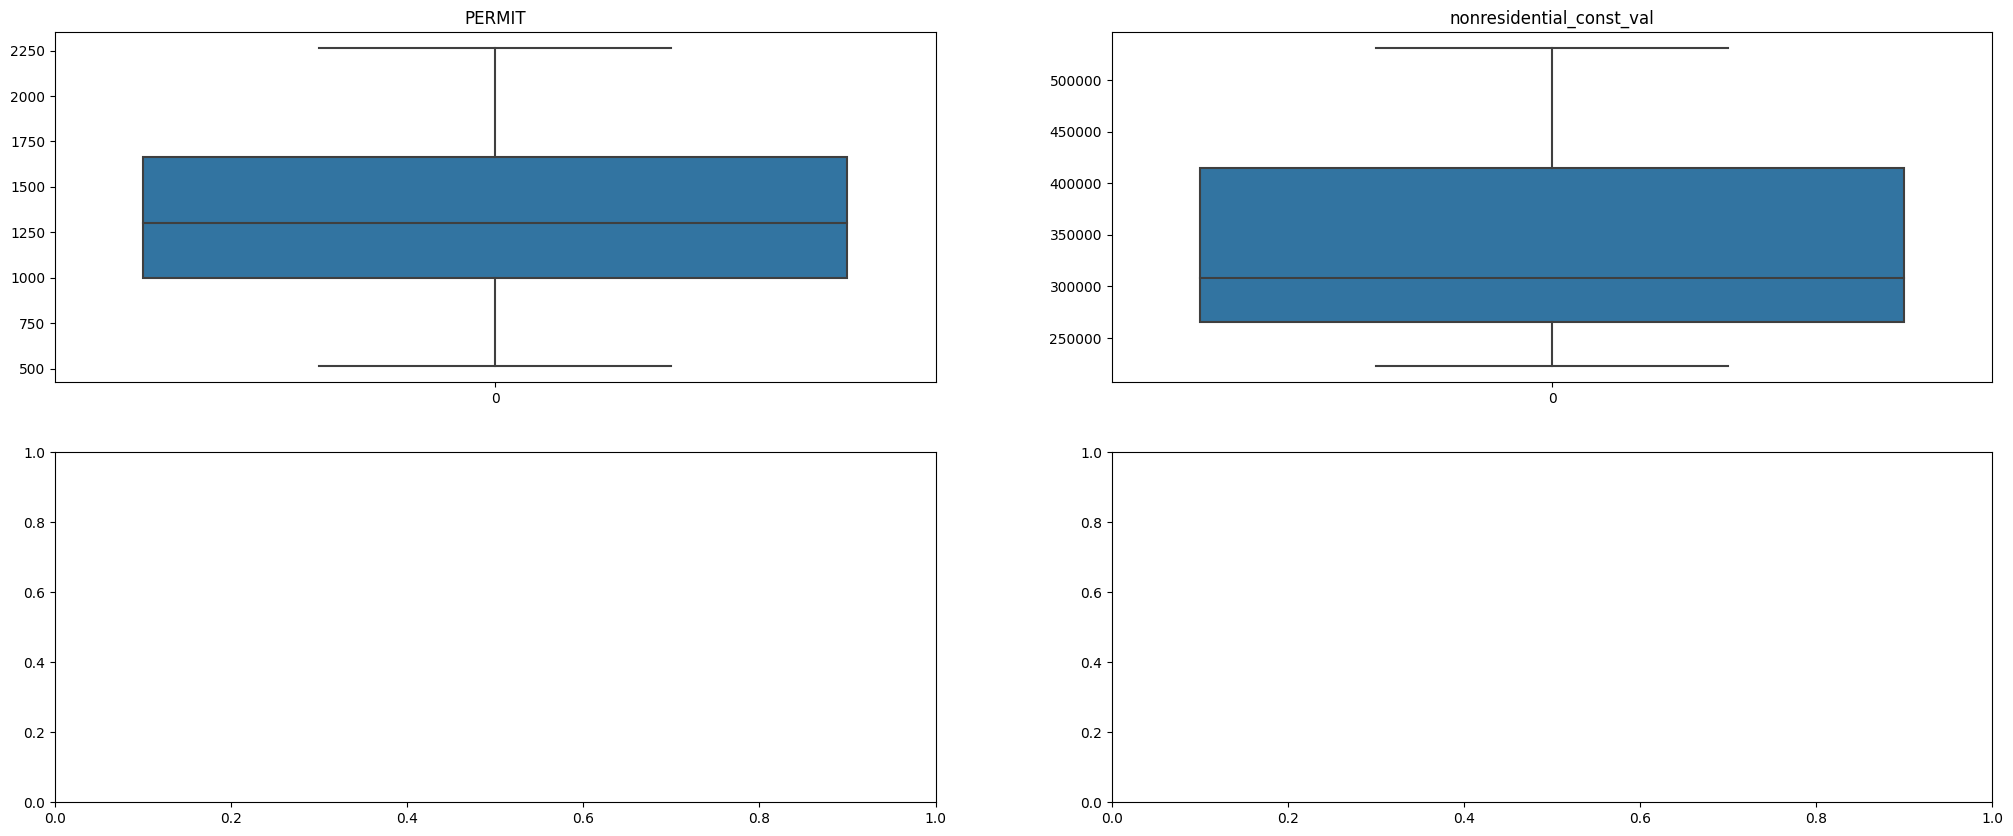

In [54]:
# Box plots
figure, axis = plt.subplots(2, 2, figsize=(25,10))

sns.boxplot(infdf['PERMIT'], ax=axis[0, 0])
axis[0, 0].set_title("PERMIT")

sns.boxplot(infdf['nonresidential_const_val'], ax=axis[0, 1])
axis[0, 1].set_title("nonresidential_const_val")





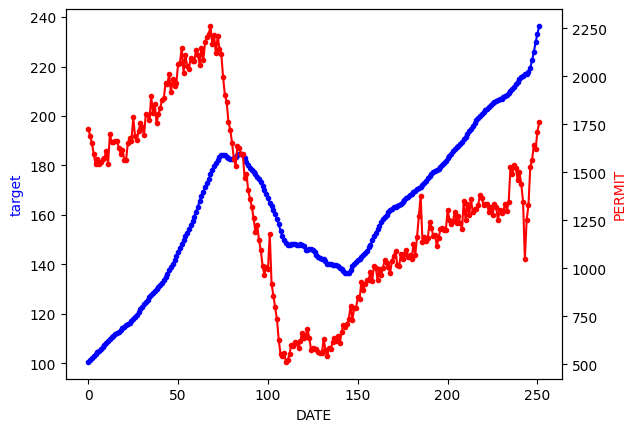

[[1.         0.03158244]
 [0.03158244 1.        ]]


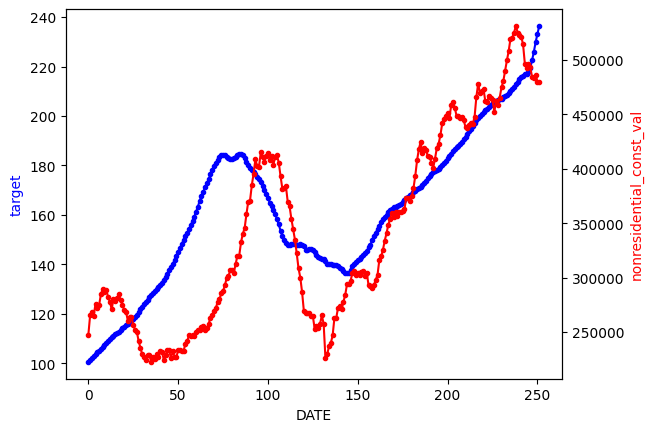

[[1.         0.80819455]
 [0.80819455 1.        ]]


In [55]:
plot_line(infdf,"target","PERMIT")
plot_line(infdf,"target","nonresidential_const_val")


In [56]:
infdf["PERMIT_cum"] = np.log((infdf["PERMIT"].cumsum()))
infdf["nonresidential_const_val"] = np.log(infdf["nonresidential_const_val"].cumsum())

infdf["PERMIT_cum"] = infdf["PERMIT"].rolling(window=12).sum()
infdf["nonresidential_const_val"] = infdf["nonresidential_const_val"].rolling(window=12).sum()

<Axes: >

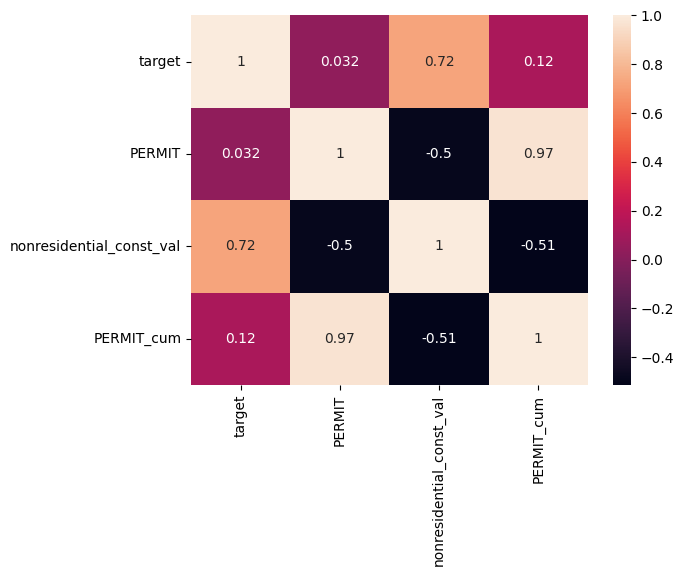

In [192]:
sns.heatmap(infdf.corr(),annot=True)